# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 scikit-learn==1.2.2 matplotlib==3.7.1 seaborn==0.13.1 xgboost==2.0.3

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [51]:
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV, train_test_split
#format numeric data for easier readability

# to display numbers rounded off to 2 decimal places
pd.set_option(
    "display.float_format", lambda x: "%.2f" % x
)

In [52]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [80]:
from pickle import TRUE
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [74]:
# function to create labeled barplots

def labeled_barplot_comp(data, feature, feature_2, order, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    feature_2: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    ax = sns.countplot(
        data=data,
        x=feature,
        palette='viridis',
        order=order,
        hue=feature_2,
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=9,
            xytext=(0, 5),
            textcoords="offset points"
        )  # annotate the percentage

    plt.show()  # show the plot

In [143]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5), cmap='viridis')
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [117]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

# Importing Dataset

In [4]:
#read the data
visa = pd.read_csv('EasyVisa.csv')

In [5]:
#make a copy of the data
dfdata = visa.copy()

# Overview of the Dataset

In [6]:
#view the forst 5 rows
dfdata.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [7]:
#view the last 5 rows
dfdata.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


In [8]:
#view shape of the data
dfdata.shape

(25480, 12)

the dataset has 25480 rows and 12 columns

In [9]:
#view the column namnes and data types
dfdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


1. case_id,continent,education_of_employee,has_job_experience,requires_job_training  25480,unit_of_wage,full_time_position,case_status and region_of_employment columns has object data types
2. no_of_employees and yr_of_estab have int data types
3. prevailing_wage ahs float data type

In [10]:
# checking for duplicate values
dfdata.duplicated().sum()

0

the data has no duplicates

In [13]:
#show the unique values for each column
print(dfdata.continent.unique())
print(dfdata.education_of_employee.unique())
print(dfdata.has_job_experience.unique())
print(dfdata.requires_job_training.unique())
print(dfdata.region_of_employment.unique())
print(dfdata.unit_of_wage.unique())
print(dfdata.full_time_position.unique())
print(dfdata.case_status.unique())



['Asia' 'Africa' 'North America' 'Europe' 'South America' 'Oceania']
['High School' "Master's" "Bachelor's" 'Doctorate']
['N' 'Y']
['N' 'Y']
['West' 'Northeast' 'South' 'Midwest' 'Island']
['Hour' 'Year' 'Week' 'Month']
['Y' 'N']
['Denied' 'Certified']


1. Continent has the following unique values 'Asia' 'Africa' 'North America' 'Europe' 'South America' 'Oceania'
2. education_of_employee has the following unique values 'High School' "Master's" "Bachelor's" 'Doctorate'
3. region_of_employment has the following unique values 'West' 'Northeast' 'South' 'Midwest' 'Island'

Let's check the count of each unique category in each of the categorical variables

In [9]:
# Making a list of all categorical variables
cat_col = list(dfdata.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(dfdata[column].value_counts())
    print("-" * 50)

case_id
EZYV01       1
EZYV16995    1
EZYV16993    1
EZYV16992    1
EZYV16991    1
            ..
EZYV8492     1
EZYV8491     1
EZYV8490     1
EZYV8489     1
EZYV25480    1
Name: count, Length: 25480, dtype: int64
--------------------------------------------------
continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64
--------------------------------------------------
education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64
--------------------------------------------------
has_job_experience
Y    14802
N    10678
Name: count, dtype: int64
--------------------------------------------------
requires_job_training
N    22525
Y     2955
Name: count, dtype: int64
--------------------------------------------------
region_of_employment
Northeast    7195
South        7017
West         6586
Midwest      

1. The Asia has 16861 applicants, Europe 3732, North America 3292, South America 852, Africa 551 and Oceania the least i.e 192 applicants
2. From the total number of applicants, their level of education awas as follows, Bachelor's 10234, Master's 9634, High School 3420 and those with PHD wer 2192
3. From the total number of applicants those Certified were 17018 while 8462 were Denied visa.         


In [10]:
# checking the number of unique values in the case_id column
dfdata.case_id.nunique()

25480

from above, each row has a unique case_id

## Data Overview

- Observations
- Sanity checks

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [144]:
#Let's check the statistical summary of the numerical data columns
dfdata.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.00,5667.09,22877.92,11.00,1022.00,2109.00,3504.00,602069.00
yr_of_estab,25480.00,1979.41,42.37,1800.00,1976.00,1997.00,2005.00,2016.00
prevailing_wage,25480.00,74455.81,52815.94,2.14,34015.48,70308.21,107735.51,319210.27


1. no_of_employees has a mean of 5667, a maximum of 602069 and minimum of -26. Since number of employes cannot be negative the data needs further investigation to ensure its clean.
2. yr_of_estab has a minimum of 1800 and a maximum of 2016. The mean and other statistics like std may not make sense since this is a date denotes the year of establishment.
3.Prevailing wage has a mean of 74455.81 a maximun of 319210.27 and a minimum of 2.14. This minimum prevailing wage is very small and should be investigated further.

In [146]:
#we filter the applications with prevailing wage of less than 10
dfdata[dfdata['prevailing_wage'] < 10]

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
634,Asia,Master's,N,N,834,1977,Northeast,3.32,Hour,Y,Denied
5384,North America,Master's,N,N,4405,1993,Northeast,8.52,Hour,Y,Denied
5455,North America,Doctorate,Y,Y,2038,2007,Northeast,3.49,Hour,Y,Certified
8914,Asia,Bachelor's,N,N,4427,1998,Northeast,5.64,Hour,Y,Denied
10006,North America,Master's,N,N,2816,1974,Northeast,9.53,Hour,Y,Denied
13544,North America,High School,Y,N,3191,2003,Northeast,5.09,Hour,Y,Denied
17033,Asia,Master's,Y,N,2587,1989,South,7.06,Hour,Y,Certified
17448,South America,Master's,Y,N,4421,1999,Northeast,3.00,Hour,Y,Denied
19425,North America,Bachelor's,Y,N,2051,2004,Northeast,5.19,Hour,Y,Denied
19593,Asia,Master's,N,N,528,2004,Northeast,5.41,Hour,Y,Certified


In [148]:
#We count the applications whose prevailing wage is less than 10
dfdata[dfdata['prevailing_wage'] < 10].shape

(14, 11)

The applications with a prevailing wage of less than 10 are 14. They all have an hourly unit of wage meaning that they are possibly odd jobs.

In [145]:
#Let's check the statistical summary of the data columns and include object data types
dfdata.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
continent,25480,6,Asia,16861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_of_employee,25480,4,Bachelor's,10234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_job_experience,25480,2,Y,14802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requires_job_training,25480,2,N,22525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_employees,25480.00,NaN,NaN,NaN,5667.09,22877.92,11.00,1022.00,2109.00,3504.00,602069.00
yr_of_estab,25480.00,NaN,NaN,NaN,1979.41,42.37,1800.00,1976.00,1997.00,2005.00,2016.00
region_of_employment,25480,5,Northeast,7195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevailing_wage,25480.00,NaN,NaN,NaN,74455.81,52815.94,2.14,34015.48,70308.21,107735.51,319210.27
unit_of_wage,25480,4,Year,22962,NaN,NaN,NaN,NaN,NaN,NaN,NaN
full_time_position,25480,2,Y,22773,NaN,NaN,NaN,NaN,NaN,NaN,NaN


1. The columns have the following unique values continent-6, education_of_employee-4, has_job_experience-2, requires_job_training-2, region_of_employment-5, unit_of_wage-4, full_time_position-2 and case_status-2.
2. Asia tops the other continents in the number of applicants with a count of 16861.
3. The Bachelor's is the most common level of education of the applicant with a count of 10234.
4. The most common region of employment is Northeast with 7185 applicants.
5. The most common unit of wage is Yearly with 22962 applicants.
6. Full time job applications are most common with a total of 22773 aplications
7. Of the applications submitted during the period of this data, 17018 were certified constituting of ~66.8%.


## Univariate Analysis

### Observations on number of employees

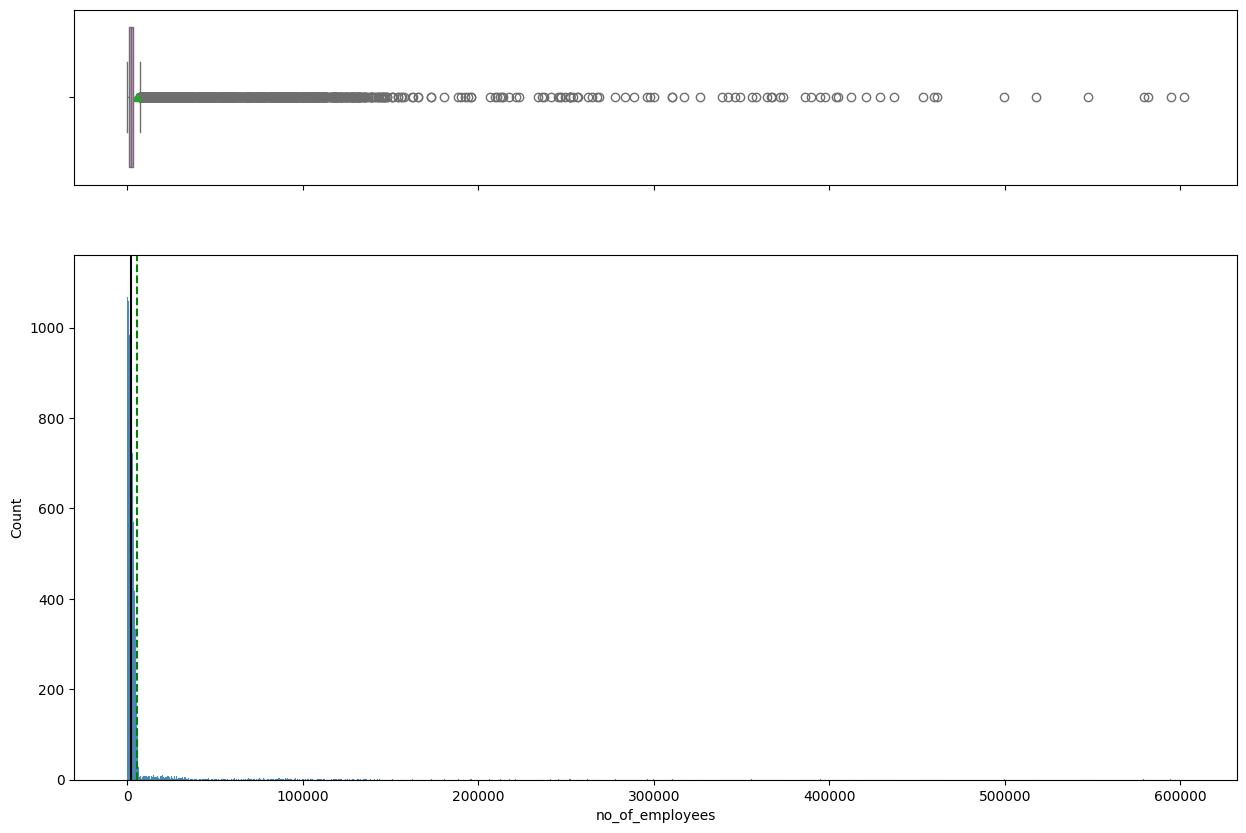

In [20]:
#create a histogram and boxplot of number of employees
histogram_boxplot(dfdata, 'no_of_employees')


The data and graphs above, indicate the distribution of companies by number of employee is heavily right skewed

Observations on prevailing wage

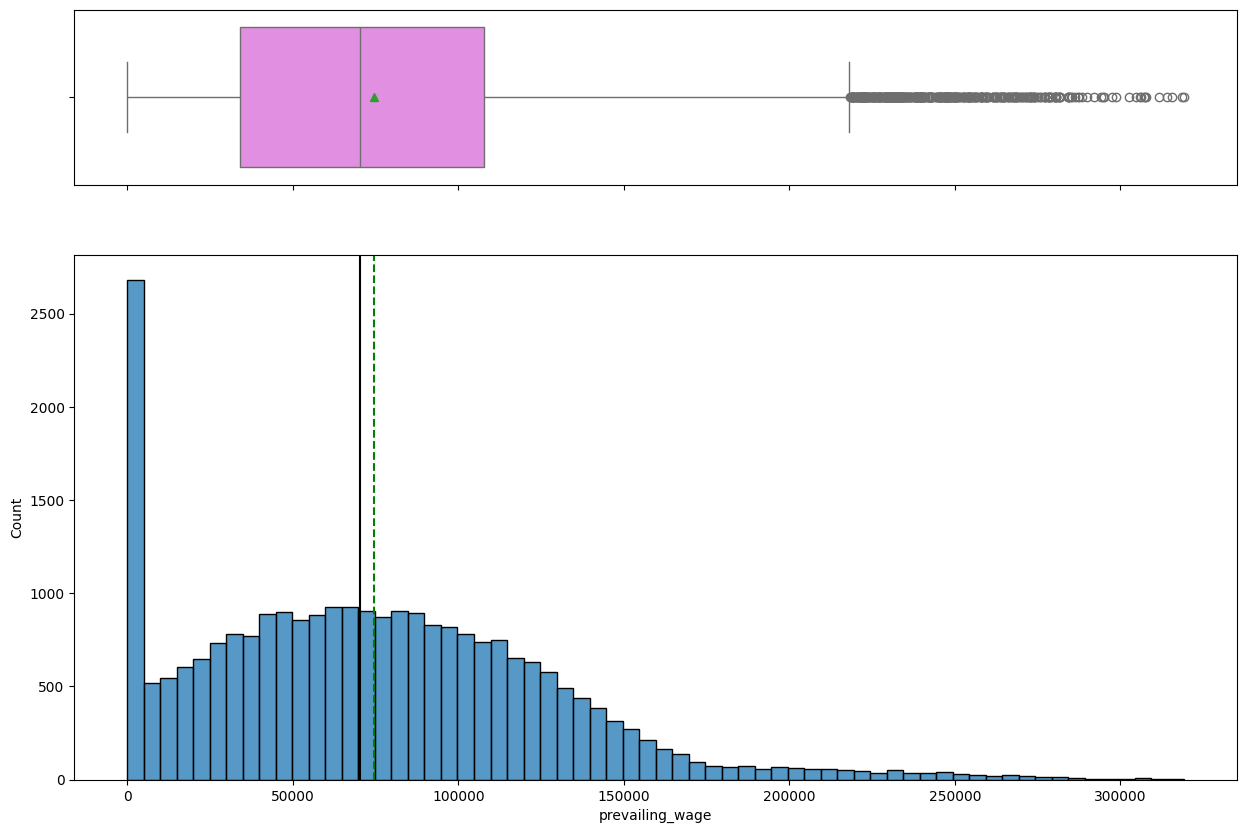

In [21]:
#Create a histogram and boxplot on prevailing wage
histogram_boxplot(dfdata, 'prevailing_wage')

1. Prevailing wage is rightskewed
2. There are many jobs with low prevailing wage value



In [27]:
#select rows with pravailing wage of zero
dfdata[dfdata['prevailing_wage'] <10000]

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
7,North America,Bachelor's,Y,N,3035,1924,West,418.2298,Hour,Y,Denied
16,Europe,Master's,Y,N,76638,1991,Midwest,3706.7900,Year,Y,Certified
36,Europe,High School,Y,N,2520,1981,West,2490.1200,Year,Y,Denied
54,Asia,Master's,Y,N,11733,1995,Northeast,230.8072,Hour,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...
25460,Europe,Master's,Y,Y,413,1997,West,8263.4700,Year,Y,Certified
25461,Asia,Master's,Y,N,2861,2004,West,54.9196,Hour,Y,Denied
25465,North America,High School,N,N,2577,1995,South,481.2238,Hour,Y,Certified
25466,Europe,Bachelor's,Y,N,1938,2005,West,6973.4000,Year,Y,Denied


there are 3205 jobs with a prevailing wage of 10,000 and below.

In [30]:
# checking the observations which have less than 100 prevailing wage
dfdata.loc[dfdata['prevailing_wage'] < 100]


,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
338,Asia,Bachelor's,Y,N,2114,2012,Northeast,15.7716,Hour,Y,Certified
634,Asia,Master's,N,N,834,1977,Northeast,3.3188,Hour,Y,Denied
839,Asia,High School,Y,N,4537,1999,West,61.1329,Hour,Y,Denied
876,South America,Bachelor's,Y,N,731,2004,Northeast,82.0029,Hour,Y,Denied
995,Asia,Master's,N,N,302,2000,South,47.4872,Hour,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...
25023,Asia,Bachelor's,N,Y,3200,1994,South,94.1546,Hour,Y,Denied
25258,Asia,Bachelor's,Y,N,3659,1997,South,79.1099,Hour,Y,Denied
25308,North America,Master's,N,N,82953,1977,Northeast,42.7705,Hour,Y,Denied
25329,Africa,Bachelor's,N,N,2172,1993,Northeast,32.9286,Hour,Y,Denied


In [32]:
#get the count of the values in the unit_of_wage column for applicant whose prevailing wage if less than 100
dfdata.loc[dfdata['prevailing_wage'] < 100, 'unit_of_wage'].value_counts()

,count
unit_of_wage,
Hour,176


There are 176 rows

Observations on continent

In [97]:
#Compute the counts for distribution of applicants per continent
dfdata.continent.value_counts()

,count
continent,
Asia,16861
Europe,3732
North America,3292
South America,852
Africa,551
Oceania,192


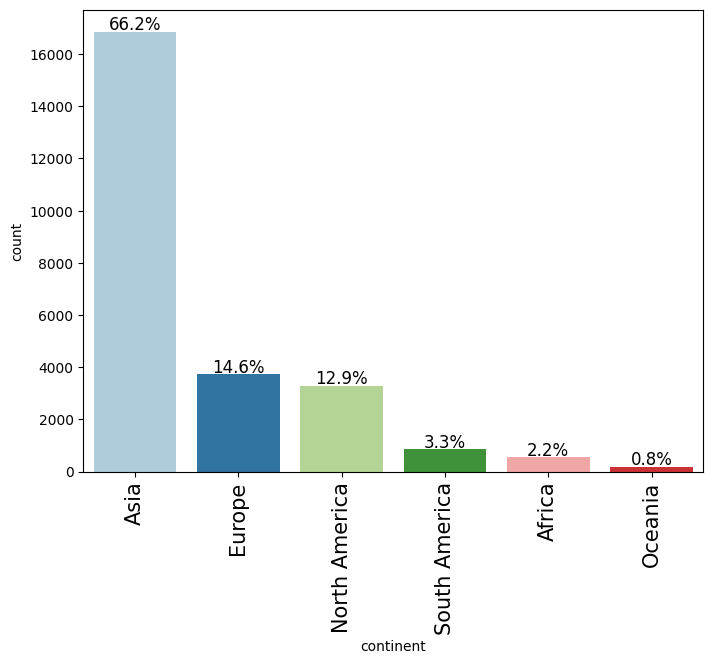

In [96]:
#Create a barplot showing distribution of applications per continent
labeled_barplot(dfdata, 'continent',perc=True)

1. Most applicants are from Asia (66%) followed by  (14.6%) and North America.
2. The continenct with least applicants is Oceania, less than 1%.

Observations on education of employee

In [95]:
#compute counts for distribution of education of employees
dfdata.education_of_employee.value_counts()

,count
education_of_employee,
Bachelor's,10234
Master's,9634
High School,3420
Doctorate,2192


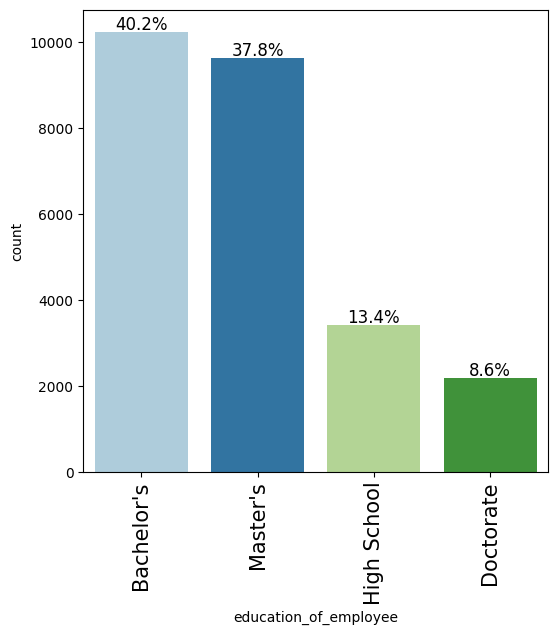

In [94]:
#create a barplot on education of employee
labeled_barplot(dfdata, 'education_of_employee',perc=True)

1. Most applicants have Bachelor's (40%), followed by Master's (37.8%)
2. Few have PHD, i.e 2192 (8%) applicants.

Observations on job experience

In [93]:
#compute the counts for distribution of job experience
dfdata.has_job_experience.value_counts()

,count
has_job_experience,
Y,14802
N,10678


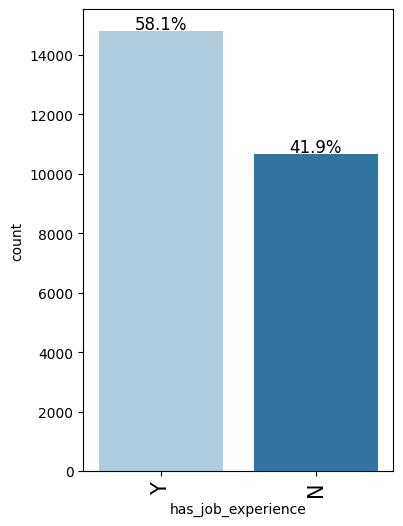

In [92]:
#Create a barplot on job experience
labeled_barplot(dfdata, 'has_job_experience',perc=True)

58% of the job applicants have job experience.

Observations on job training

In [91]:
#Compute the counts of distribution for jobs requiring training
dfdata.requires_job_training.value_counts()

,count
requires_job_training,
N,22525
Y,2955


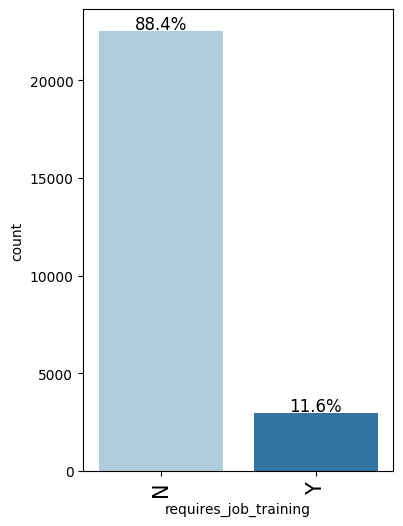

In [90]:
#Create a barplot for distibution of job training
labeled_barplot(dfdata, 'requires_job_training',perc=True)

88% of the applicants for work visa are for jobs requiring training

Observations on region of employment

In [87]:
#compute the counts for distribution of region of employment
dfdata.region_of_employment.value_counts()

,count
region_of_employment,
Northeast,7195
South,7017
West,6586
Midwest,4307
Island,375


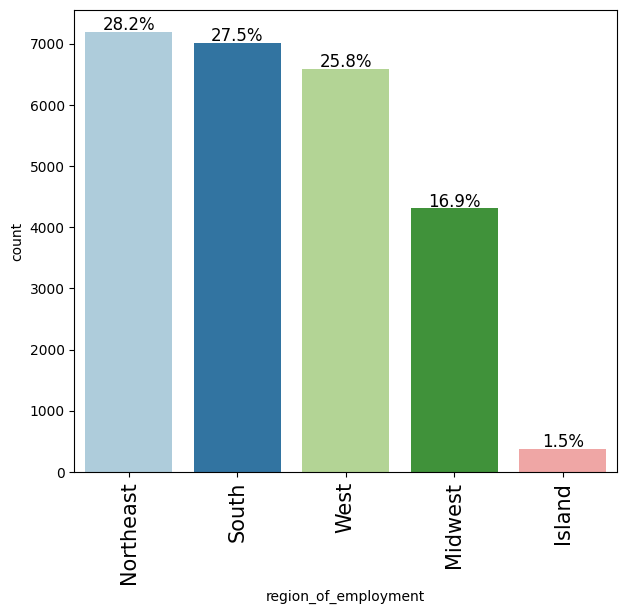

In [86]:
#Create a barplot for distribution for region of employment
labeled_barplot(dfdata, 'region_of_employment',perc=True)

1. Northeast	region has most applicants at 28% followed by South	region with 27.5%
2. Island	region has the least at 1.47%

Observations on unit of wage

In [88]:
#Compute the counts for unit of wage
dfdata.unit_of_wage.value_counts()

,count
unit_of_wage,
Year,22962
Hour,2157
Week,272
Month,89


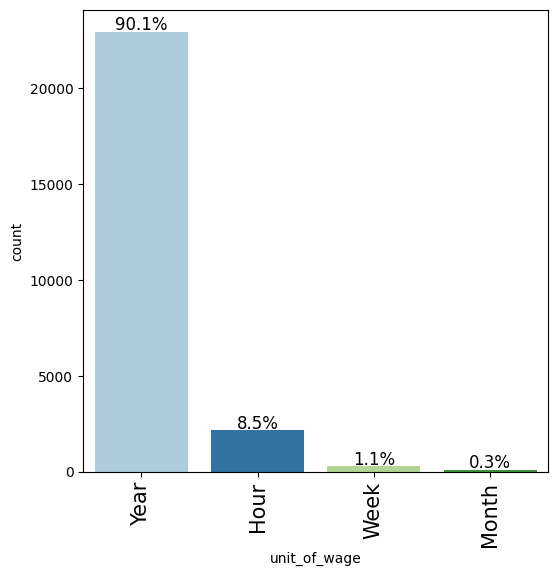

In [85]:
#Create a bar plot for the distribution of unit of wage
labeled_barplot(dfdata, 'unit_of_wage',perc=True)

1. Year unit of wage constitute of 90% of the applicants followed by Hour	at 8.5%
2. Month	unit of wage constitute of 0.03%

Observations on case status

In [89]:
#Compute the counts for case status
dfdata.case_status.value_counts()

,count
case_status,
Certified,17018
Denied,8462


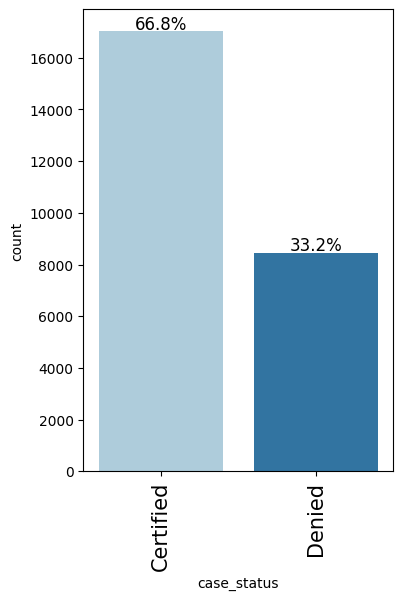

In [84]:
#Create a barplot for distribution of case status
labeled_barplot(dfdata, 'case_status',perc=True)

The Certified cases constitute of 66.8%

## Bivariate Analysis

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?

2. How does the visa status vary across different continents?

3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?

4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?

5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?

In [105]:
#Compute the counts for education of employee versus the case status
dfdata.groupby(['education_of_employee','case_status']).size()

education_of_employee  case_status
Bachelor's             Certified      6367
                       Denied         3867
Doctorate              Certified      1912
                       Denied          280
High School            Certified      1164
                       Denied         2256
Master's               Certified      7575
                       Denied         2059
dtype: int64

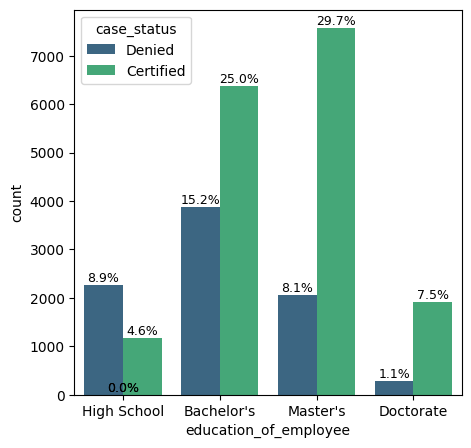

In [83]:
#Create a barplot of level of education versus case status
labeled_barplot_comp(dfdata,'education_of_employee','case_status', order=["High School","Bachelor's","Master's","Doctorate"], perc=True)

* From the graph and counts aboves, the ratio of applications being certified versus denied increases considerably as an applicant's highest level of education achieved increases.
* The ratio of an applicant with a high school diploma being approved versus denied is ~1:2, whereas the same ratio for an applicant with a doctorate is ~7:1.

2. How does the visa status vary across different continents?

In [107]:
#Compute the counts of continents versus visa status
dfdata.groupby(['continent','case_status']).size()

continent      case_status
Africa         Certified        397
               Denied           154
Asia           Certified      11012
               Denied          5849
Europe         Certified       2957
               Denied           775
North America  Certified       2037
               Denied          1255
Oceania        Certified        122
               Denied            70
South America  Certified        493
               Denied           359
dtype: int64

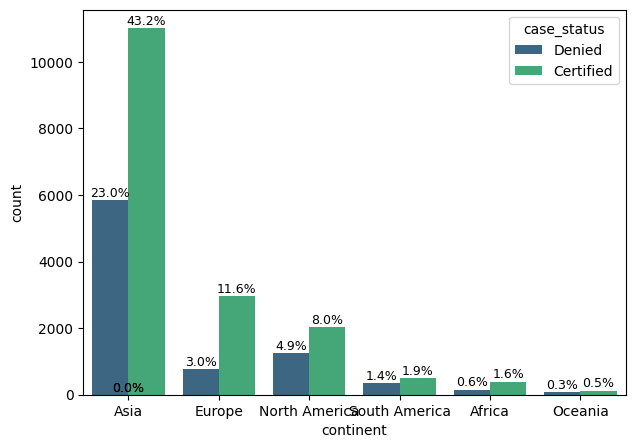

In [108]:
#Create a barplot for continent versus visa status
labeled_barplot_comp(dfdata,'continent','case_status', order=['Asia','Europe','North America','South America','Africa','Oceania'], perc=True)

*  Applicants from Asia comprise ~66% of all applications and these applicants have ~2:1 ratio of approvals to denials.
*   Applications from Europe has the best ratio of approvals to denials (~4:1).
*   Applicationa from Africa constitute of ~2.2%. The ratio of approval vs denial is 1.36:1


3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?

In [109]:
#Compute the counts for work experience versus visa status
dfdata.groupby(['has_job_experience','case_status']).size()

has_job_experience  case_status
N                   Certified       5994
                    Denied          4684
Y                   Certified      11024
                    Denied          3778
dtype: int64

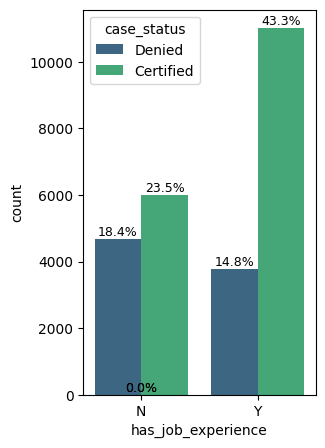

In [111]:
#Create a barplot for work experience versus visa status
labeled_barplot_comp(dfdata,'has_job_experience','case_status', order=None, perc=True)

* Job experience is certainly a factor to consider. Applicants with job experience have a ratio of approved to denied applications of ~3:1, whereas the same ratio for applicants without job experience have a ration of ~5:4 ratio.

4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?

In [113]:
#compute counts for unit of wage  versus visa status
dfdata.groupby(['unit_of_wage','case_status']).size()

unit_of_wage  case_status
Hour          Certified        747
              Denied          1410
Month         Certified         55
              Denied            34
Week          Certified        169
              Denied           103
Year          Certified      16047
              Denied          6915
dtype: int64

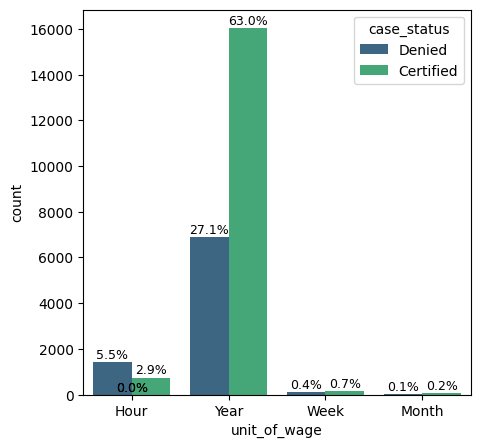

In [114]:
#Create a bar plot for for unit of wage  versus visa status
labeled_barplot_comp(dfdata,'unit_of_wage','case_status', order=None, perc=True)

*   Applicants who are applying to work in a job with an hourly comprise of ~8% of the total applicants. They have a ratio of approved versus denied applications of ~1:2.
*   Applicants from yearly unit of wage constitute of 90% of the applicants and have a nearly a 2.5:1 ratio of approvals to denials.

5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

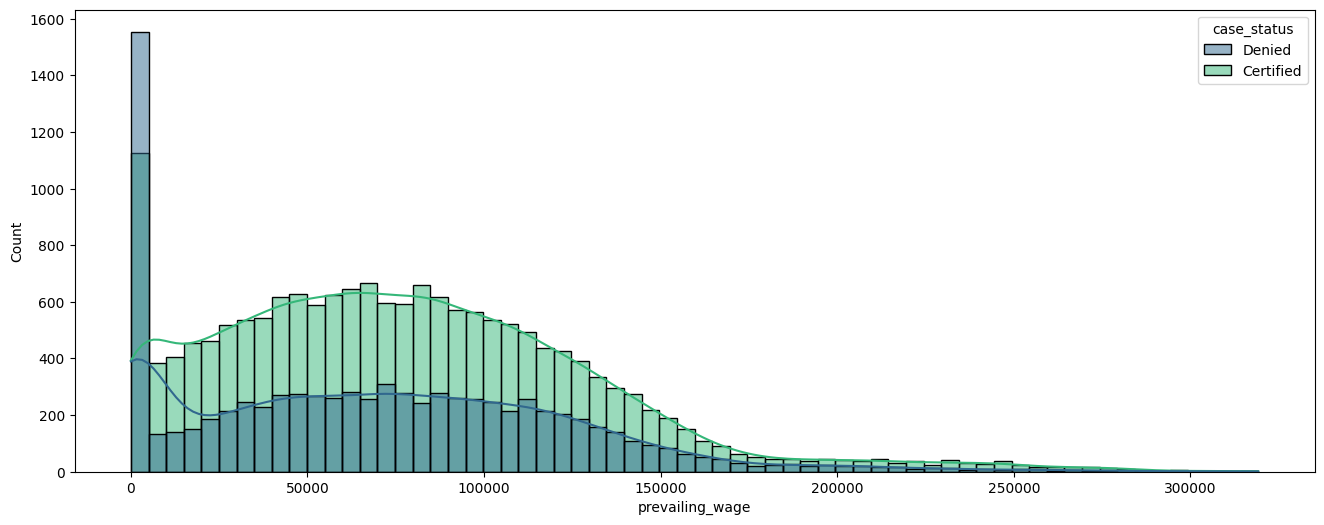

In [137]:
#Plot a histogram of prevailing wage versus visa status
plt.figure(figsize=(16, 6))
sns.histplot(data=dfdata, x='prevailing_wage', hue='case_status', kde=True, palette='viridis')
plt.show()

From the graph above the ratio of Certified versus Denied visa status is not dependent on the pravailing wage. The ratio remain the same across different valuse of prevailing wage.

In [120]:
#Select Annual unit of age in a dataframe
df_annual = dfdata[dfdata['unit_of_wage'] == 'Year']

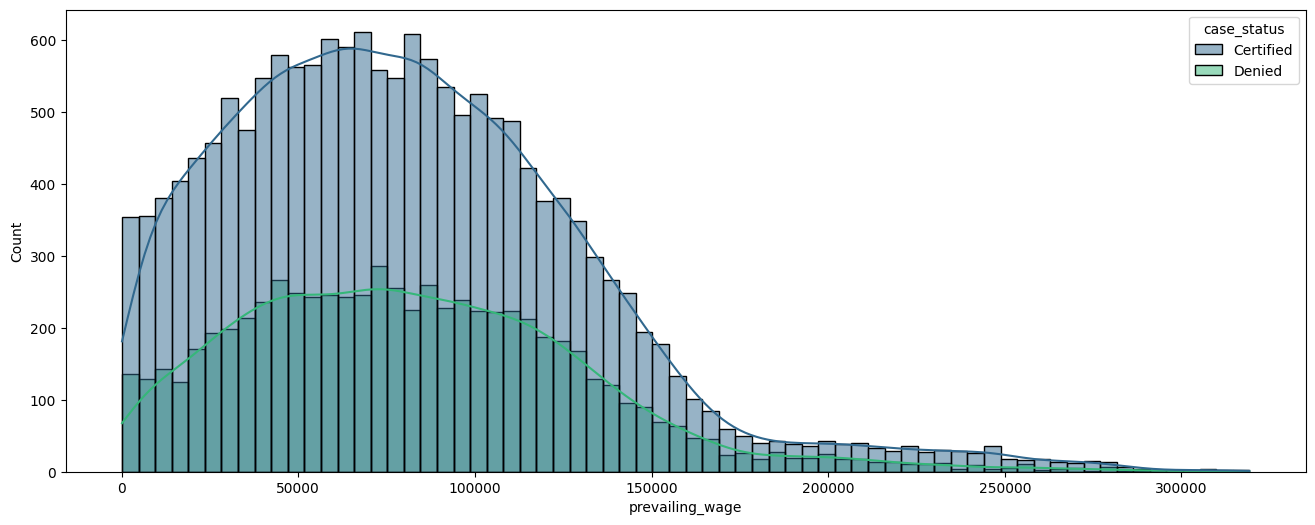

In [123]:
#Plot the distibution for the visa status
plt.figure(figsize=(16, 6))
sns.histplot(data=df_annual, x='prevailing_wage', hue='case_status', kde=True, palette='viridis')
plt.show()


From the above chart, visa status ratio(denied and Certified) remain relatively the same.

In [124]:
#Filter prevailing rate for monthly unit of wage to a data frame
df_monthly = dfdata[dfdata['unit_of_wage'] == 'Month']

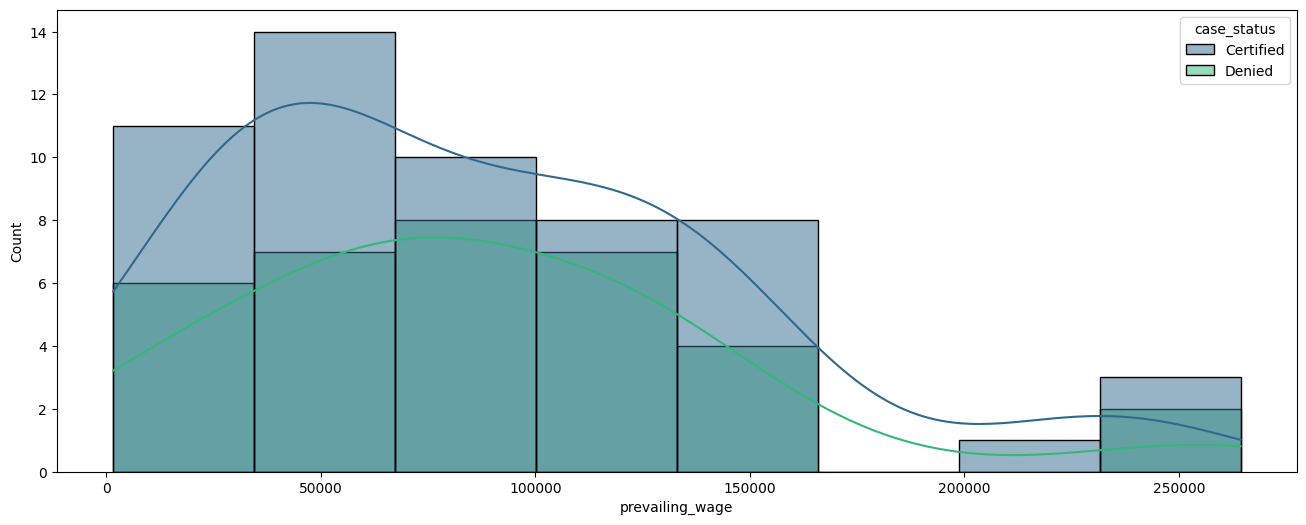

In [125]:
#Plot the distibution for the visa status for Monthly unit of payment
plt.figure(figsize=(16, 6))
sns.histplot(data=df_monthly, x='prevailing_wage', hue='case_status', kde=True, palette='viridis')
plt.show()

In [131]:
#Filter prevailing rate for weekly unit of wage to a data frame
df_weekly = dfdata[dfdata['unit_of_wage'] == 'Week']

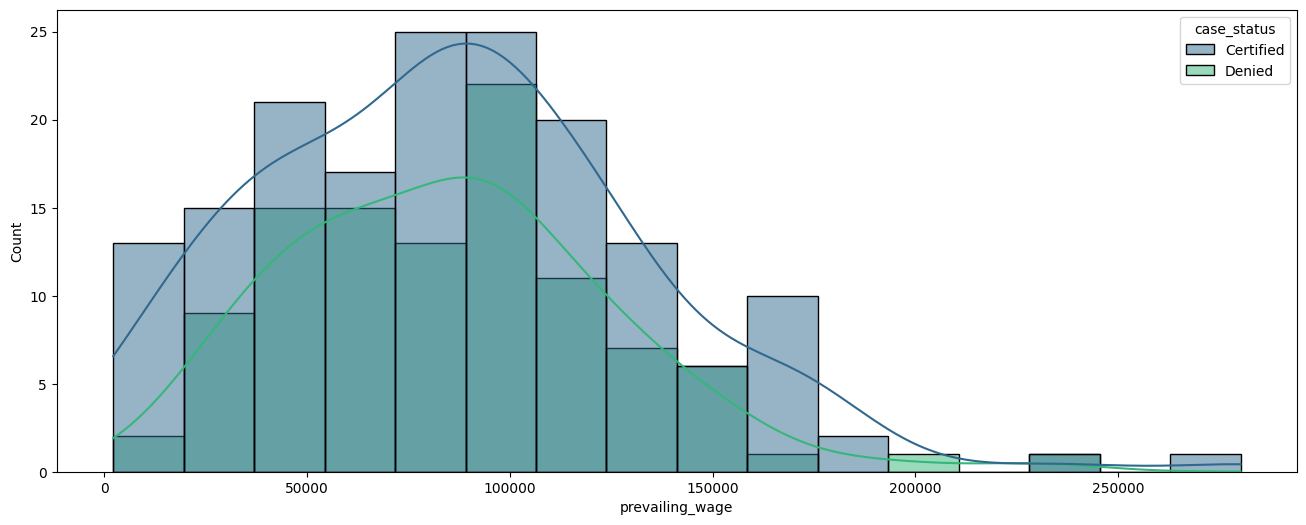

In [133]:
#Plot the distibution for the visa status for Weekly unit of payment
plt.figure(figsize=(16, 6))
sns.histplot(data=df_weekly, x='prevailing_wage', hue='case_status', kde=True, palette='viridis')
plt.show()

In [134]:
#Filter prevailing rate for hourly unit of wage to a data frame
df_hourly = dfdata[dfdata['unit_of_wage'] == 'Hour']

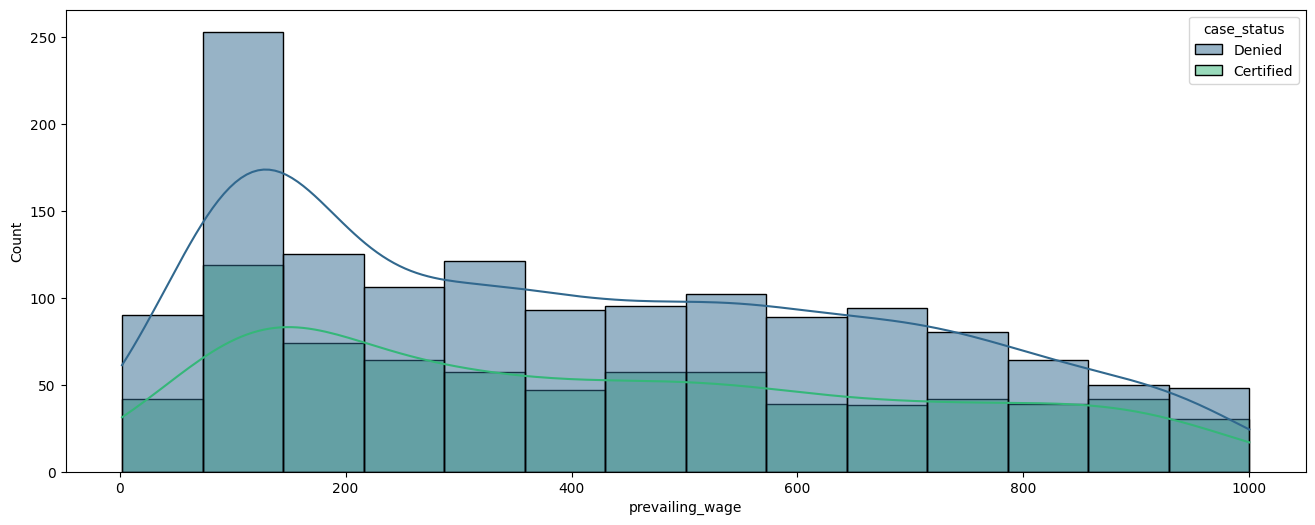

In [135]:
#Plot the distibution for the visa status for hourly unit of payment
plt.figure(figsize=(16, 6))
sns.histplot(data=df_hourly, x='prevailing_wage', hue='case_status', kde=True, palette='viridis')
plt.show()

It is clear that across all unit of wages monthly, weekly and hourly for the prevailing wage, the ratios of Certified versus Denied remain relatively close.

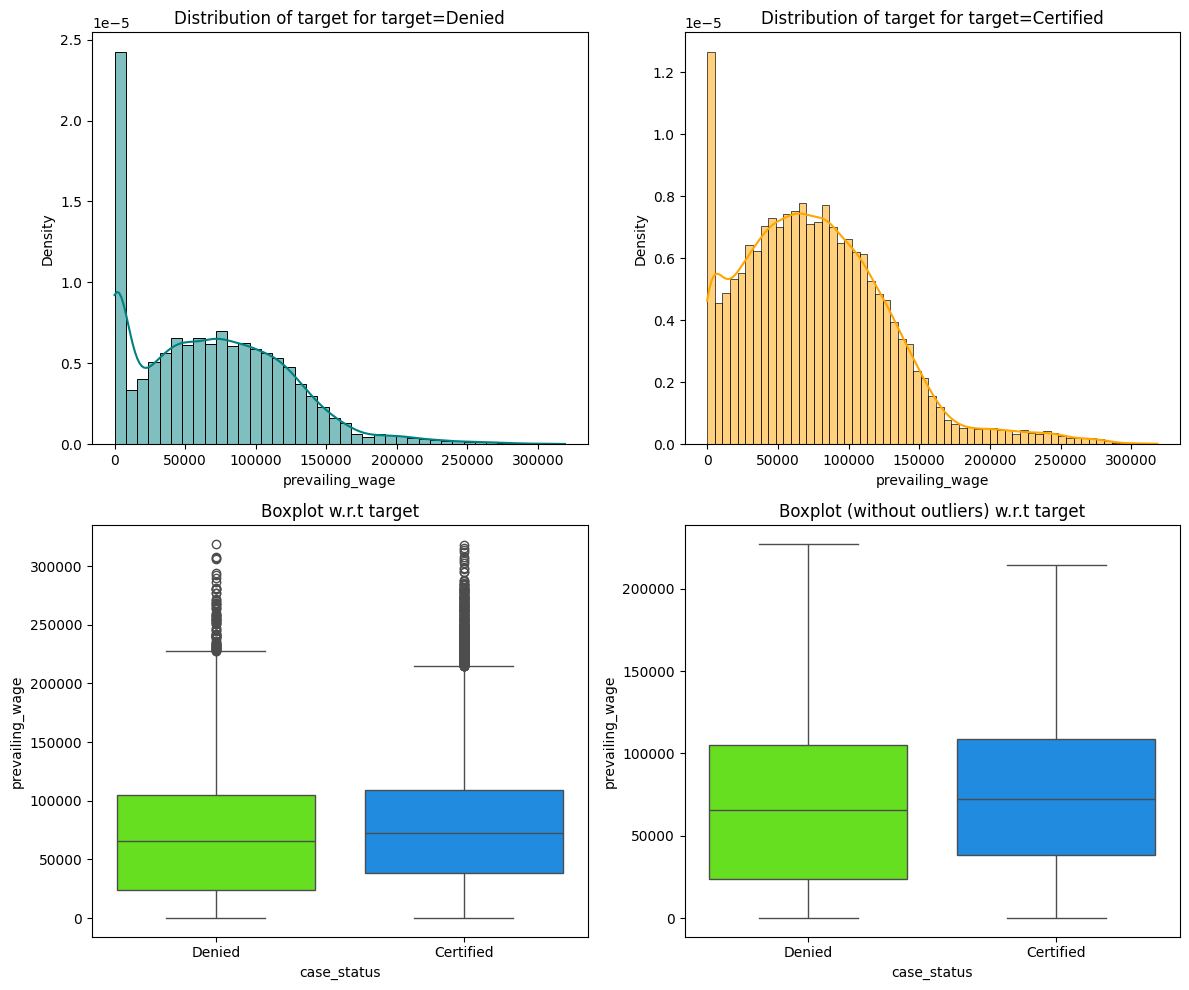

In [118]:
#plot of prevailing wage versus visa status

distribution_plot_wrt_target(dfdata, 'prevailing_wage', 'case_status')

continent    Africa   Asia  Europe  North America  Oceania  South America  \
case_status                                                                 
All             551  16861    3732           3292      192            852   
Certified       397  11012    2957           2037      122            493   
Denied          154   5849     775           1255       70            359   

continent      All  
case_status         
All          25480  
Certified    17018  
Denied        8462  
------------------------------------------------------------------------------------------------------------------------


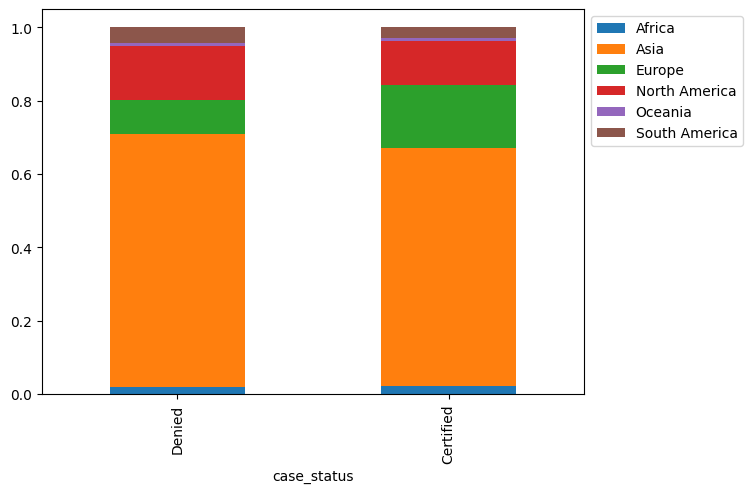

education_of_employee  Bachelor's  Doctorate  High School  Master's    All
case_status                                                               
All                         10234       2192         3420      9634  25480
Certified                    6367       1912         1164      7575  17018
Denied                       3867        280         2256      2059   8462
------------------------------------------------------------------------------------------------------------------------


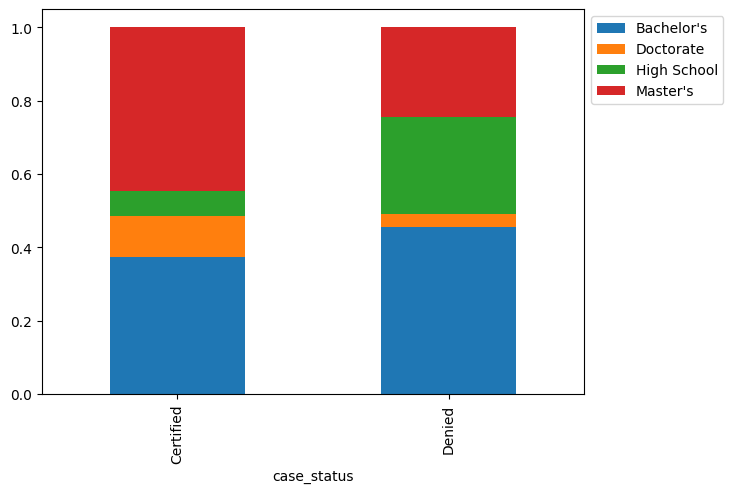

has_job_experience      N      Y    All
case_status                            
All                 10678  14802  25480
Certified            5994  11024  17018
Denied               4684   3778   8462
------------------------------------------------------------------------------------------------------------------------


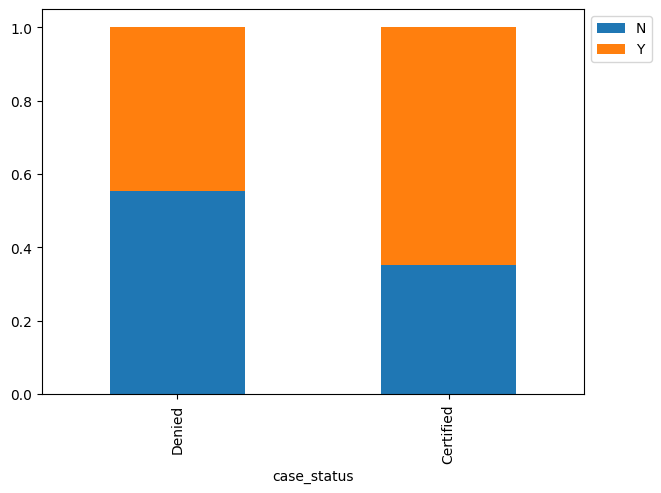

requires_job_training      N     Y    All
case_status                              
All                    22525  2955  25480
Certified              15012  2006  17018
Denied                  7513   949   8462
------------------------------------------------------------------------------------------------------------------------


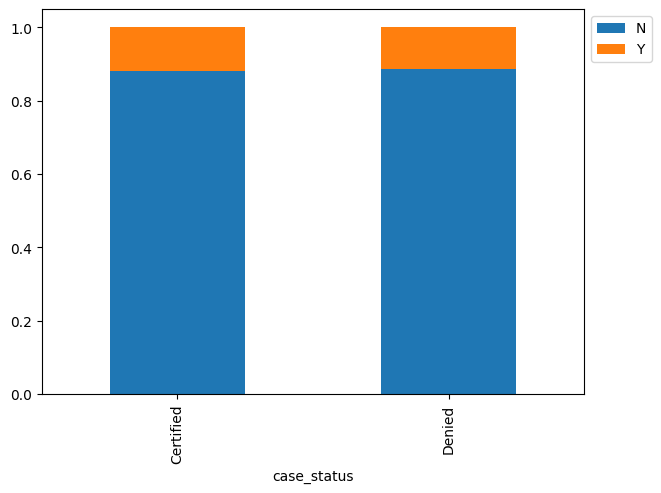

region_of_employment  Island  Midwest  Northeast  South  West    All
case_status                                                         
All                      375     4307       7195   7017  6586  25480
Certified                226     3253       4526   4913  4100  17018
Denied                   149     1054       2669   2104  2486   8462
------------------------------------------------------------------------------------------------------------------------


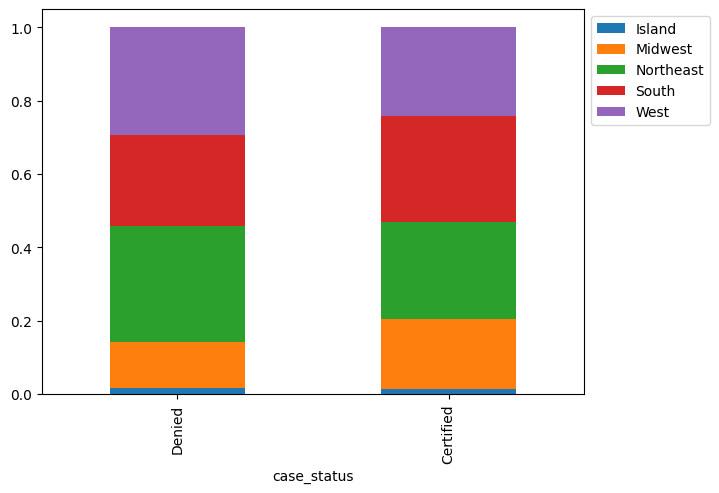

unit_of_wage  Hour  Month  Week   Year    All
case_status                                  
All           2157     89   272  22962  25480
Certified      747     55   169  16047  17018
Denied        1410     34   103   6915   8462
------------------------------------------------------------------------------------------------------------------------


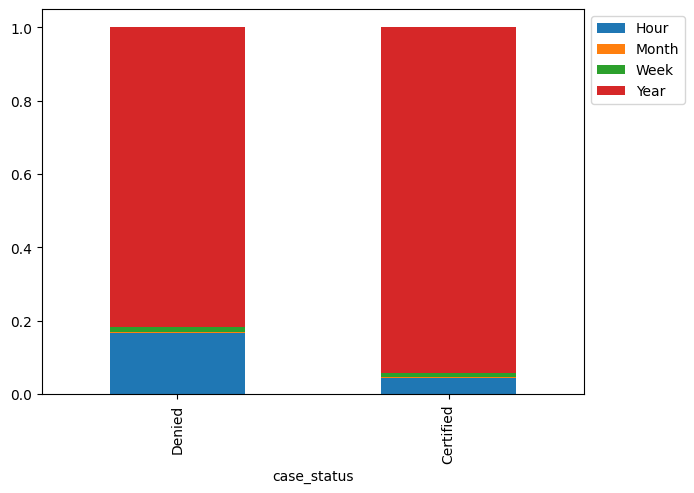

full_time_position     N      Y    All
case_status                           
All                 2707  22773  25480
Certified           1855  15163  17018
Denied               852   7610   8462
------------------------------------------------------------------------------------------------------------------------


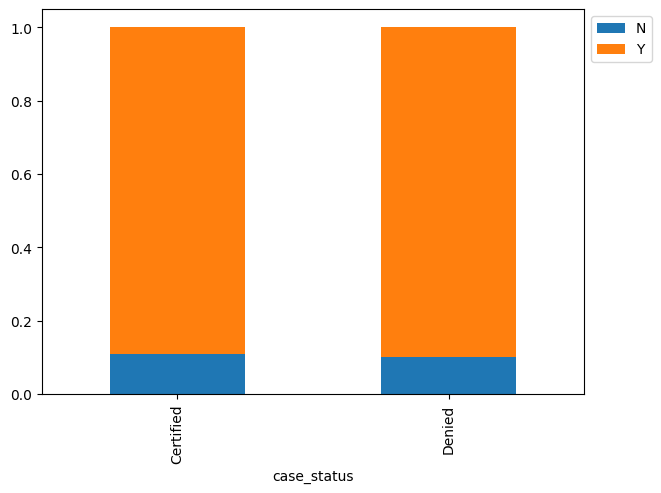

case_status  Certified  Denied    All
case_status                          
Denied               0    8462   8462
All              17018    8462  25480
Certified        17018       0  17018
------------------------------------------------------------------------------------------------------------------------


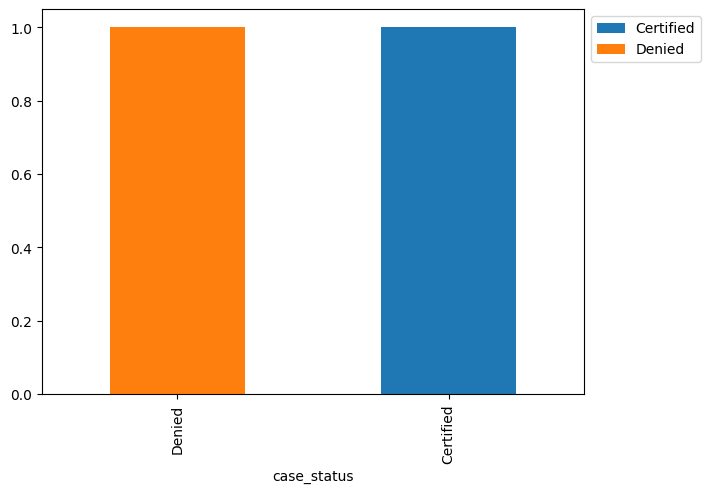

In [141]:
#create a table and stacked barplot for each variable with a data type of category by case_status
cols_cat = dfdata.select_dtypes(['object'])
for i in cols_cat.columns:
    stacked_barplot(dfdata, "case_status", i)

In [57]:
dfdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   continent              25480 non-null  object 
 1   education_of_employee  25480 non-null  object 
 2   has_job_experience     25480 non-null  object 
 3   requires_job_training  25480 non-null  object 
 4   no_of_employees        25480 non-null  int64  
 5   yr_of_estab            25480 non-null  int64  
 6   region_of_employment   25480 non-null  object 
 7   prevailing_wage        25480 non-null  float64
 8   unit_of_wage           25480 non-null  object 
 9   full_time_position     25480 non-null  object 
 10  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 2.1+ MB


## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [5]:
## Check negative values in the n-_of_employees column
dfdata[dfdata['no_of_employees'] < 0]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
245,EZYV246,Europe,Master's,N,N,-25,1980,Northeast,39452.9900,Year,Y,Certified
378,EZYV379,Asia,Bachelor's,N,Y,-11,2011,Northeast,32506.1400,Year,Y,Denied
832,EZYV833,South America,Master's,Y,N,-17,2002,South,129701.9400,Year,Y,Certified
2918,EZYV2919,Asia,Master's,Y,N,-26,2005,Midwest,112799.4600,Year,Y,Certified
6439,EZYV6440,Asia,Bachelor's,N,N,-14,2013,South,103.9700,Hour,Y,Denied
6634,EZYV6635,Asia,Bachelor's,Y,N,-26,1923,West,5247.3200,Year,Y,Denied
7224,EZYV7225,Europe,Doctorate,N,N,-25,1998,Midwest,141435.9500,Year,Y,Certified
7281,EZYV7282,Asia,High School,N,N,-14,2000,Midwest,58488.5000,Year,Y,Denied
7318,EZYV7319,Asia,Bachelor's,Y,Y,-26,2006,South,115005.6100,Year,Y,Certified
7761,EZYV7762,Asia,Master's,N,N,-11,2009,Midwest,38457.5100,Year,Y,Certified


In [14]:
#do a count of the negative values
dfdata[dfdata['no_of_employees'] < 0].shape

(33, 12)

there are 33 rows with negative values

In [15]:
#replace the negative values with absolute values
dfdata['no_of_employees'] = dfdata['no_of_employees'].abs()

In [16]:
#check if replacement is successful
dfdata[dfdata['no_of_employees'] < 0]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status


Replacement is successful. No more negative values in the no_of emplyees column.

In [17]:
#we drop the case_id column since it is not required for analysis and midel building.
dfdata.drop('case_id',axis=1,inplace=True)

Outlier Check



*   Let's check for outliers in the data.


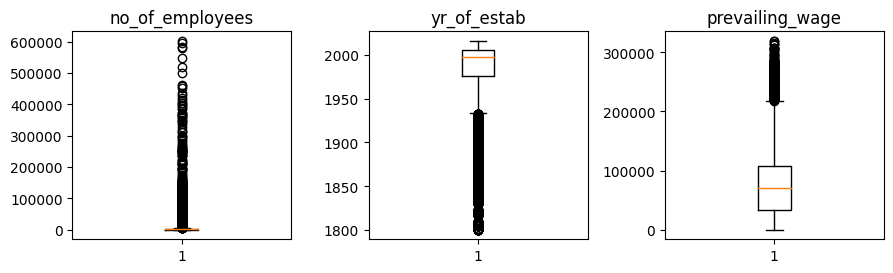

In [12]:
# outlier detection using boxplot
numeric_columns = dfdata.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(12, 10))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(dfdata[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

1. from above analysis no_of_employees and prevailing_wage has many outlier.
2. We note outliers on the yr_of_estab but we know its the year when the employer's company was established and an absoulute value.
3. There will be no outlier treatment since the values represents the reality on the ground.

Data Preparation for modeling
*   We want to predict which visa will be certified.
*   Before we proceed to build a model, we'll have to encode categorical features.
*   We'll split the data into train and test to be able to evaluate the model that we build on the train data.


In [13]:
#we convert the values of case status to '0's and '1's, "Denied" and "Certified" respectively
dfdata["case_status"] = dfdata["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

In [14]:
#we confirm the values have been replaced accordingly
dfdata.head(20)

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,0
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,1
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,0
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,0
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,1
5,Asia,Master's,Y,N,2339,2012,South,78252.1400,Year,Y,1
6,Asia,Bachelor's,N,N,4985,1994,South,53635.3900,Year,Y,1
7,North America,Bachelor's,Y,N,3035,1924,West,418.2298,Hour,Y,0
8,Asia,Bachelor's,N,N,4810,2012,Midwest,74362.1900,Year,Y,1
9,Europe,Doctorate,Y,N,2251,1995,South,67514.7600,Year,Y,1


Conversion was successful

In [15]:
#convert the case_status column to a numerical data type
dfdata['case_status'] = dfdata['case_status'].astype('int')

In [16]:
#confirm conversion
dfdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   continent              25480 non-null  object 
 1   education_of_employee  25480 non-null  object 
 2   has_job_experience     25480 non-null  object 
 3   requires_job_training  25480 non-null  object 
 4   no_of_employees        25480 non-null  int64  
 5   yr_of_estab            25480 non-null  int64  
 6   region_of_employment   25480 non-null  object 
 7   prevailing_wage        25480 non-null  float64
 8   unit_of_wage           25480 non-null  object 
 9   full_time_position     25480 non-null  object 
 10  case_status            25480 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 2.1+ MB


In [17]:
#create a dataframe of the predictor feature columns
X=dfdata.drop('case_status',axis=1)
#create a datafrane of the predicted class (1=True, 0=False)
Y = dfdata['case_status']

In [18]:
X.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y


In [19]:
#generate dummy variables for each categorical variable
#X = pd.get_dummies(X, drop_first=True)
X = pd.get_dummies(X,columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,) # creating dummy variables

#split the data into train and test datasets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [20]:
#confirm the split
print("{0:0.2f}% data is in training set".format((len(x_train)/len(dfdata.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(dfdata.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [21]:
#confirm the shape of both data sets and the ratio of classes is the same across both train and test datasets
print("Shape of Training set : ", x_train.shape)
print("Shape of test set : ", x_test.shape)
print(' ')
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 21)
Shape of test set :  (7644, 21)
 
Percentage of classes in training set:
case_status
1    0.663602
0    0.336398
Name: proportion, dtype: float64
Percentage of classes in test set:
case_status
1    0.677917
0    0.322083
Name: proportion, dtype: float64


In [22]:
X.head()

,no_of_employees,yr_of_estab,prevailing_wage,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,education_of_employee_Doctorate,education_of_employee_High School,education_of_employee_Master's,has_job_experience_Y,requires_job_training_Y,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year,full_time_position_Y
0,14513,2007,592.2029,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True
1,2412,2002,83425.6500,True,False,False,False,False,False,False,True,True,False,False,True,False,False,False,False,True,True
2,44444,2008,122996.8600,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,True
3,98,1897,83434.0300,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True
4,1082,2005,149907.3900,False,False,False,False,False,False,False,True,True,False,False,False,True,False,False,False,True,True


## EDA

- It is a good idea to explore the data once again after manipulating it.

### Model Evaluation Criteria



### Model can make wrong predictions as:

1. Model predicts that the visa application will get certified but in reality, the visa application should get denied.
2. Model predicts that the visa application will not get certified but in reality, the visa application should get certified.

### Which case is more important?
* Both the cases are important as:

* If a visa is certified when it had to be denied a wrong employee will get the job position while US citizens will miss the opportunity to work on that position.

* If a visa is denied when it had to be certified the U.S. will lose a suitable human resource that can contribute to the economy.



### How to reduce the losses?

* `F1 Score` can be used a the metric for evaluation of the model, greater the F1  score higher are the chances of minimizing False Negatives and False Positives.
* We will use balanced class weights so that model focuses equally on both classes.

**First, we create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.**
* The model_performance_classification_sklearn function will be used to check the model performance of models.
* The confusion_matrix_sklearn function will be used to plot the confusion matrix.

In [23]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [24]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Decision Tree - Model Building and Hyperparameter Tuning

### Decision Tree Model

In [191]:
dtree_estimator = DecisionTreeClassifier(criterion='gini', random_state=1, class_weight='balanced')
dtree_estimator.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

We have built the model using the DecisionTreeClassifier function.

Checking model performance on training set

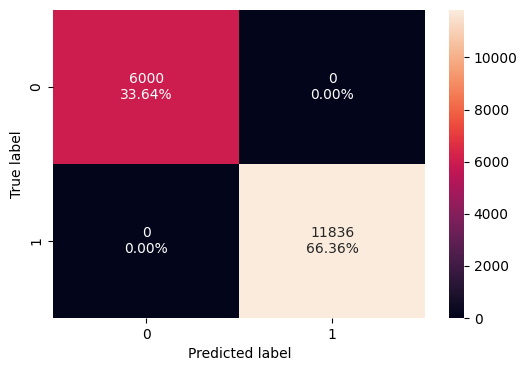

In [156]:
#create confusion matrix
confusion_matrix_sklearn(dtree_estimator, x_train, y_train) #Checking the confusion matrix with sklearn

### Check performance on train data

In [157]:
decision_tree_perf_train = model_performance_classification_sklearn(dtree_estimator, x_train, y_train)
print("Training performance model0:")
decision_tree_perf_train


Training performance model0:


,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


### Checking model performance on test set

In [158]:
dtree_estimator_test_perf=model_performance_classification_sklearn(dtree_estimator, x_test, y_test)
print("Testing performance \n",dtree_estimator_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.662088  0.746044   0.753166  0.749588


decision tree performance poorly on testing data but perfectly on training data denoting overfit.

### Decision Tree with Hyperparameter Tuning

In [106]:
# Choose the type of classifier.
dtree_estimator_tuned = DecisionTreeClassifier(class_weight="balanced", random_state=1)

# Grid of parameters to choose from
parameters = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search with n_jobs = -1
grid_obj = GridSearchCV(dtree_estimator_tuned, parameters, cv=5, n_jobs=-1)
#fit the grid_obj on the train data
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator_tuned.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=15,
                       min_impurity_decrease=0.0001, random_state=1)

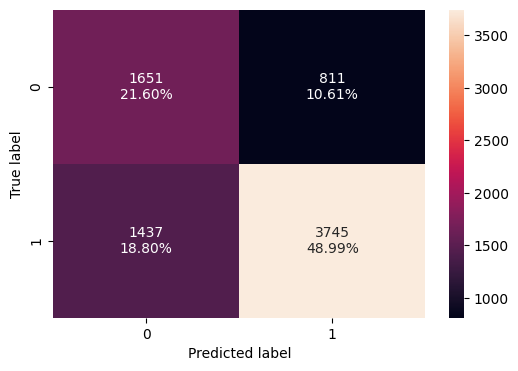

In [107]:
#create confusion matrix
confusion_matrix_sklearn(dtree_estimator_tuned, x_test, y_test)

In [113]:
#checking model performance on training set
dtree_estimator_tuned_train_perf=model_performance_classification_sklearn(dtree_estimator_tuned, x_train, y_train)
print("Training performance \n",dtree_estimator_tuned_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.710137  0.726259   0.816644  0.768804


In [114]:
#checking model performance on testing data
dtree_estimator_tuned_test_perf=model_performance_classification_sklearn(dtree_estimator_tuned, x_test, y_test)
print("Testing performance \n",dtree_estimator_tuned_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.705913  0.722694   0.821993  0.769152


## Building bagging and boosting models

### Bagging - Model Building and Hyperparameter Tuning

In [149]:
bagging = BaggingClassifier(random_state=1)
bagging.fit(x_train,y_train)

BaggingClassifier(random_state=1)

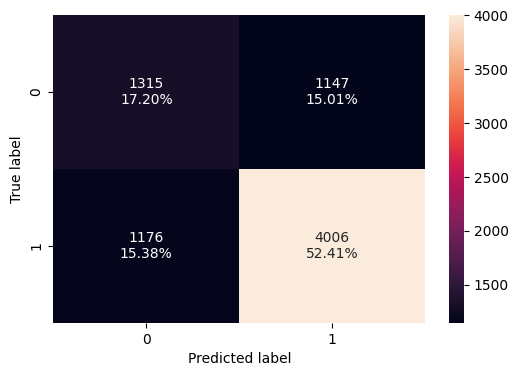

In [150]:
#create a confusion matrix of the classifier's performance on the testing data
confusion_matrix_sklearn(bagging, x_test, y_test)

Checking performance on the training set

In [151]:
bagging_train_perf=model_performance_classification_sklearn(bagging, x_train, y_train)
print("Testing performance \n",bagging_train_perf)



Testing performance 
    Accuracy    Recall  Precision        F1
0  0.984526  0.985468   0.991162  0.988307


Checking performance on the testing set

In [152]:
bagging_test_perf=model_performance_classification_sklearn(bagging, x_test, y_test)
print("Testing performance \n",bagging_test_perf)

Testing performance 
    Accuracy    Recall  Precision       F1
0  0.696102  0.773061   0.777411  0.77523


This bagging classifer is overfit to the training dataset but has a higher F1 score.

### Hyperparameter Tuning - Bagging Classifier

In [118]:
# Choose the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_samples": [0.8, 0.9,1],
    "max_features": [0.7,0.8,0.9],
    "n_estimators": np.arange(30,50,70),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search with cv = 5
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(x_train, y_train)


# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(x_train, y_train)


BaggingClassifier(max_features=0.7, max_samples=0.8, n_estimators=30,
                  random_state=1)

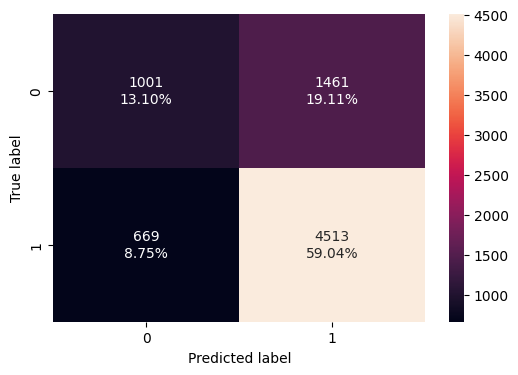

In [119]:
#confusion matrix of the classifier's performance on the testing data
confusion_matrix_sklearn(bagging_estimator_tuned, x_test,y_test)

In [120]:

#Checking performance on the training set
bagging_estimator_tuned_train_perf=model_performance_classification_sklearn(bagging_estimator_tuned, x_train,y_train)
print("Training performance \n",bagging_estimator_tuned_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.994674  0.998564   0.993444  0.995997


In [121]:
#Checking performance on the testing set
bagging_estimator_tuned_test_perf=model_performance_classification_sklearn(bagging_estimator_tuned, x_test, y_test)
print("Testing performance \n",bagging_estimator_tuned_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0   0.72135  0.870899    0.75544  0.809071


1. The Bagging Classifier after tuning performs far less well on the test data than on the training data, indicating that the model is still overfit.
2.However, this model does perform better than the base model.

### Random Forest

In [122]:
# Choose the type of classifier.
rf_estimator = RandomForestClassifier(random_state=1)
# Fit the best algorithm to the data.
rf_estimator.fit(x_train, y_train)

RandomForestClassifier(random_state=1)

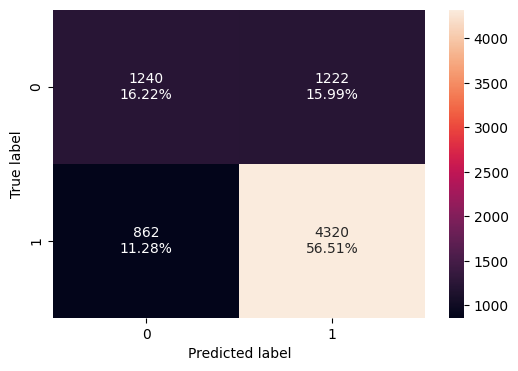

In [123]:
#create a confusion matrix of the classifier's performance on the testing data
confusion_matrix_sklearn(rf_estimator, x_test,y_test)

In [124]:
#Checking model performance on training set
rf_estimator_train_model_perf=model_performance_classification_sklearn(rf_estimator, x_train,y_train)
print("Training performance \n",rf_estimator_train_model_perf)

Training performance 
    Accuracy  Recall  Precision        F1
0  0.999944     1.0   0.999916  0.999958


In [125]:
#Checking performance on testing set
rf_estimator_test_model_perf=model_performance_classification_sklearn(rf_estimator, x_test,y_test)
print("Testing performance \n",rf_estimator_test_model_perf)

Testing performance 
    Accuracy    Recall  Precision       F1
0  0.727368  0.833655   0.779502  0.80567


## Hyperparameter Tuning - Random Forest

Hyperparameters for Random Forest include:

n_estimators: The number of trees in the forest, default = 100.

max_features: The number of features to consider when looking for the best split.

class_weight: Weights associated with classes in the form {class_label: weight}.If not given, all classes are supposed to have weight one.

For example: If the frequency of class 0 is 80% and the frequency of class 1 is 20% in the data, then class 0 will become the dominant class and the model will become biased toward the dominant classes. In this case, we can pass a dictionary {0:0.2,1:0.8} to the model to specify the weight of each class and the random forest will give more weightage to class 1.

bootstrap: Whether bootstrap samples are used when building trees. If False, the entire dataset is used to build each tree, default=True.

max_samples: If bootstrap is True, then the number of samples to draw from X to train each base estimator. If None (default), then draw N samples, where N is the number of observations in the train data.

oob_score: Whether to use out-of-bag samples to estimate the generalization accuracy, default=False.

Note: A lot of hyperparameters of Decision Trees are also available to tune Random Forest like max_depth, min_sample_split etc.

In [126]:
# Choose the type of classifier.
rf_estimator_tuned = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {"n_estimators": np.arange(50,110,25),
              "min_samples_leaf": np.arange(1, 4),
              "min_samples_split": [3, 5, 7],
              "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
              "max_samples": np.arange(0.4, 0.7, 0.1),
}

# Run the randomized search
rand_rf = RandomizedSearchCV(rf_estimator_tuned, parameters, scoring='f1', cv=5, n_jobs=-1, random_state=1)
rand_rf.fit(x_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_tuned = rand_rf.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_tuned.fit(x_train, y_train)

RandomForestClassifier(max_samples=0.6, min_samples_leaf=3, min_samples_split=7,
                       n_estimators=50, random_state=1)

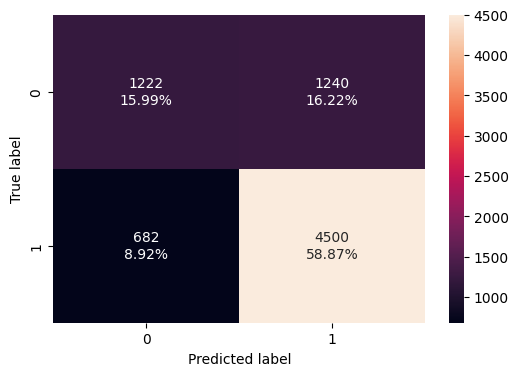

In [127]:
#create a confusion matrix of the classifier's performance on the testing data
confusion_matrix_sklearn(rf_estimator_tuned, x_test,y_test)

In [130]:
#Checking performance on the training set
rf_estimator_train_tuned_perf=model_performance_classification_sklearn(rf_estimator_tuned, x_train,y_train)
print("Training performance \n",rf_estimator_train_tuned_perf)

Training performance 
    Accuracy    Recall  Precision       F1
0  0.809599  0.914667   0.819407  0.86442


In [129]:
#Checking performance on the testing set
rf_estimator_test_tuned_perf=model_performance_classification_sklearn(rf_estimator_tuned, x_test,y_test)
print("Training performance \n",rf_estimator_test_tuned_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.748561  0.868391   0.783972  0.824025


## Boosting - Model Building and Hyperparameter Tuning

### AdaBoost Classifier

In [131]:
# Choose the type of classifier.
model_ada = AdaBoostClassifier(random_state=1)
# Fit the best algorithm to the data.
model_ada.fit(x_train, y_train)

AdaBoostClassifier(random_state=1)

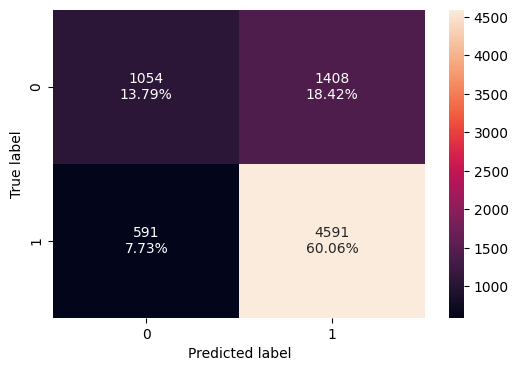

In [132]:
##create a confusion matrix of the classifier's performance on the testing data
confusion_matrix_sklearn(model_ada, x_test,y_test)

In [133]:
#Checking model performance on training set
model_ada_train_perf=model_performance_classification_sklearn(model_ada, x_train,y_train)
print("Training performance \n",model_ada_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.737441  0.885941    0.75881  0.817462


In [134]:
#Checking model performance on test data
model_ada_test_perf=model_performance_classification_sklearn(model_ada, x_test,y_test)
print("Testing performance \n",model_ada_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.738488  0.885951   0.765294  0.821215


### Hyperparameter Tuning - AdaBoost Classifier

Hyperparameters include:
   - base_estimator: The base estimator from which the boosted ensemble is built. By default the base estimator is a decision tree with max_depth=1
   - n_estimators: The maximum number of estimators at which boosting is terminated. Default value is 50.
   - learning_rate: Learning rate shrinks the contribution of each classifier by learning_rate. There is a trade-off between learning_rate and n_estimators.

In [135]:
#choose the type classifier
model_ada_tuned=AdaBoostClassifier()
# Grid of parameters to choose from
## add from article
parameters = {

    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=2, random_state=1),
                      DecisionTreeClassifier(max_depth=3, random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate":np.arange(0.01,0.1,0.05)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the randomized search
rand_abc = RandomizedSearchCV(model_ada_tuned, parameters, scoring=acc_scorer,cv=5, n_jobs=-1, random_state=1)
rand_abc.fit(x_train, y_train)

# Set the clf to the best combination of parameters
model_ada_tuned = rand_abc.best_estimator_

# Fit the best algorithm to the data.
model_ada_tuned.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.060000000000000005, n_estimators=100)

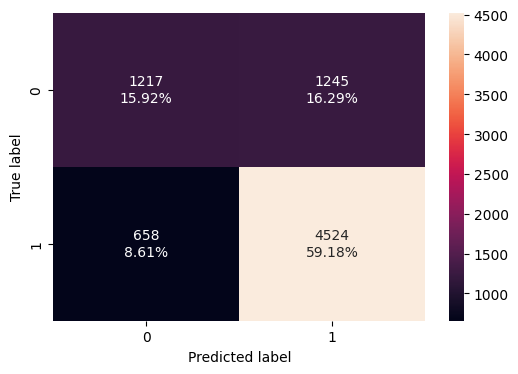

In [136]:
#create a confusion matrix for the classifier perfomance on test data
confusion_matrix_sklearn(model_ada_tuned, x_test,y_test)

In [61]:
#Checking performance on training set
model_ada_tuned_train_perf=model_performance_classification_sklearn(model_ada_tuned, x_train,y_train)
print("Training performance \n",model_ada_tuned_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.753252  0.877746   0.778611  0.825211


In [62]:
#Checking performance on testing set
model_ada_tuned_test_perf=model_performance_classification_sklearn(model_ada_tuned, x_test,y_test)
print("Testing performance \n",model_ada_tuned_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.751047  0.873022   0.784191  0.826226


## Gradient Boosting Classifier

In [137]:
# Choose the type of classifier.
model_gb = GradientBoostingClassifier()
# Fit the best algorithm to the data.
model_gb.fit(x_train, y_train)

GradientBoostingClassifier()

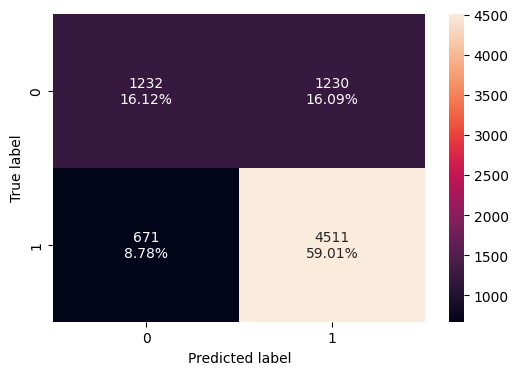

In [138]:
#create confusion matrix
confusion_matrix_sklearn(model_gb, x_test,y_test)

In [139]:
#Checking performance on training set
model_gb_train_perf=model_performance_classification_sklearn(model_gb, x_train,y_train)
print("Training performance \n",model_gb_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.755607  0.876479   0.781704  0.826383


In [140]:
#Check performance on testing set
model_gb_test_perf=model_performance_classification_sklearn(model_gb, x_test,y_test)
print("Testing performance \n",model_gb_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.751308  0.870513   0.785752  0.825964


## Hyperparameter Tuning - Gradient Boosting Classifier

In [141]:
# Choose the type of classifier.
model_gb_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters =  {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
rand_gb = RandomizedSearchCV(model_gb_tuned, parameters, scoring=acc_scorer,cv=5, n_jobs=-1, random_state=1)
rand_gb = rand_gb.fit(x_train, y_train)#fit training data

# Set the clf to the best combination of parameters
model_gb_tuned = rand_gb.best_estimator_

# Fit the best algorithm to the data.
model_gb_tuned.fit(x_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.05, max_features=1, n_estimators=50,
                           random_state=1, subsample=0.7)

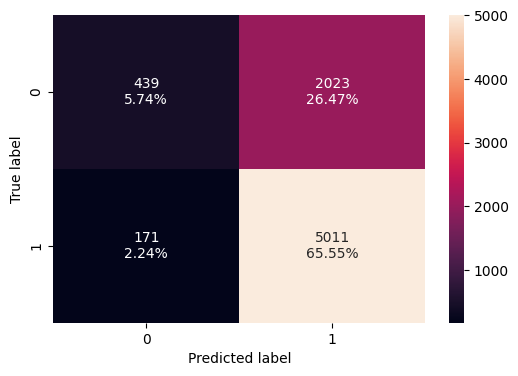

In [78]:
#create confusion matrix
confusion_matrix_sklearn(model_gb_tuned, x_test,y_test)

In [79]:
#check performance on training set
model_gb_tuned_train_perf=model_performance_classification_sklearn(model_gb_tuned, x_train,y_train)
print("Training performance \n",model_gb_tuned_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.703353  0.966036   0.700484  0.812103


In [80]:
#check performance on testing set
model_gb_tuned_test_perf=model_performance_classification_sklearn(model_gb_tuned, x_test,y_test)
print("Testing performance \n",model_gb_tuned_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.712977  0.967001   0.712397  0.820399


## XGBoost Classifier

In [142]:
model_xgb = XGBClassifier()
model_xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

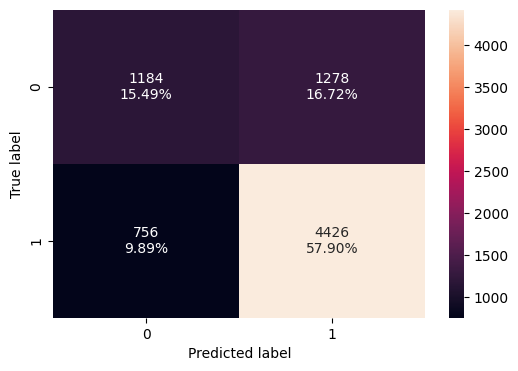

In [143]:
#create confusion matrix
confusion_matrix_sklearn(model_xgb, x_test,y_test)

In [85]:
#checking performance on training set
model_xgb_train_perf=model_performance_classification_sklearn(model_xgb, x_train,y_train)
print("Training performance \n",model_xgb_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.832305  0.923876   0.839539  0.879691


In [86]:
#checking performance on testing set
model_xgb_test_perf=model_performance_classification_sklearn(model_xgb, x_test,y_test)
print("Testing performance \n",model_xgb_test_perf)

Testing performance 
    Accuracy   Recall  Precision        F1
0  0.733909  0.85411   0.775947  0.813155


### Hyperparameter Tuning - XGBoost Classifier

Important parameters include:



*   scale_pos_weight:Control the balance of positive and negative weights, useful for unbalanced classes. It has range from 0 to  ∞ .
*   subsample: Corresponds to the fraction of observations (the rows) to subsample at each step. By default it is set to 1 meaning that we use all rows.
*   colsample_bytree: Corresponds to the fraction of features (the columns) to use.
*   colsample_bylevel: The subsample ratio of columns for each level. Columns are subsampled from the set of columns chosen for the current tree.
*   colsample_bynode: The subsample ratio of columns for each node (split). Columns are subsampled from the set of columns chosen for the current level.
*   max_depth: is the maximum number of nodes allowed from the root to the farthest leaf of a tree.
learning_rate/eta: Makes the model more robust by shrinking the weights on each step.
*   gamma: A node is split only when the resulting split gives a positive reduction in the loss function. Gamma specifies the minimum loss reduction required to make a split.

In [88]:
# Choose the type of classifier.
model_xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the randomized search
rand_xgb = RandomizedSearchCV(model_xgb_tuned, parameters, scoring=scorer,cv=5, n_jobs=-1, random_state=1)
rand_xgb = rand_xgb.fit(x_train, y_train)

# Set the clf to the best combination of parameters
model_xgb_tuned = rand_xgb.best_estimator_

# Fit the best algorithm to the data.
model_xgb_tuned.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=3, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

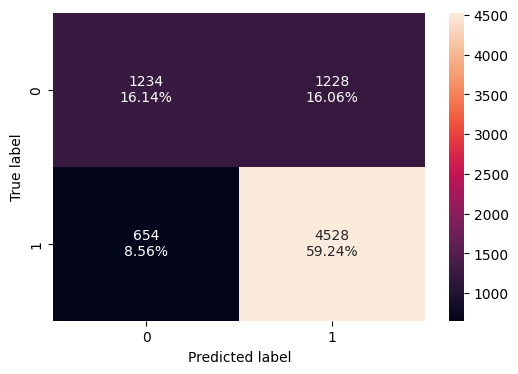

In [89]:
#create confusion matrix
confusion_matrix_sklearn(model_xgb_tuned, x_test,y_test)

In [90]:
#checking performance on training set
model_xgb_tuned_train_perf=model_performance_classification_sklearn(model_xgb_tuned, x_train,y_train)
print("Training performance \n",model_xgb_tuned_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.757849  0.882815   0.780883  0.828727


In [91]:
#checking performance on testing set
model_xgb_tuned_test_perf=model_performance_classification_sklearn(model_xgb_tuned, x_test,y_test)
print("Testing performance \n",model_xgb_tuned_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.753794  0.873794   0.786657  0.827939


## Stacking Classifier

In [96]:
estimators = [
    ("AdaBoost", model_ada_tuned),
    ("Gradient Boosting", model_gb_tuned),
    ("Random Forest", rf_estimator_tuned),
]
final_estimator = model_xgb_tuned

#define Stacking Classifier
stacking_classifier = StackingClassifier(
    estimators=estimators, final_estimator=final_estimator
)
#fit Stacking Classifier on the train data
stacking_classifier.fit(x_train, y_train)

StackingClassifier(estimators=[('AdaBoost',
                                AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                                                         random_state=1),
                                                   learning_rate=0.060000000000000005,
                                                   n_estimators=100)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           learning_rate=0.05,
                                                           max_features=1,
                                                           n_estimators=50,
                                                           random_state=1,
                                                           subsample=0.7)),...
                                                 feature_types=None, gamma=3,
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.05,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=50, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=1, ...))

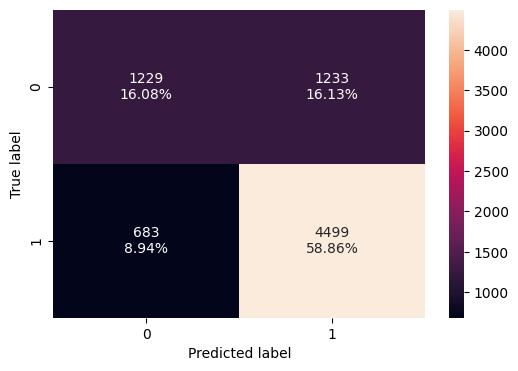

In [97]:
#create confusion matrix
confusion_matrix_sklearn(stacking_classifier, x_test,y_test)

In [98]:
#check performance on training data
stacking_classifier_train_perf=model_performance_classification_sklearn(stacking_classifier, x_train,y_train)
print("Training performance \n",stacking_classifier_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.764633  0.883322   0.787749  0.832802


In [99]:
#checking performance on testing data
stacking_classifier_test_perf=model_performance_classification_sklearn(stacking_classifier, x_test,y_test)
print("Testing performance \n",stacking_classifier_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.749346  0.868198   0.784892  0.824446


##  Will tuning the hyperparameters improve the model performance?

## Model Performance Comparison and Conclusions

1. Base Models Comparisons

In [160]:
# create a dataframe comparing the performance of the base models on the training data

models_train_comparison_df = pd.concat(
    [decision_tree_perf_train.T,
    bagging_train_perf.T,
    rf_estimator_train_model_perf.T,
    model_ada_train_perf.T,
    model_gb_train_perf.T,
    model_xgb_train_perf.T],
    axis=1,
)
models_train_comparison_df.columns = [
    "Decision Tree",
    "Bagging Classifier",
    "Random Forest",
    "AdaBoost Classifier",
    "Gradient Boosting Classifier",
    "XGBoost Classifier"]
print("Training performance comparison of base models:")
models_train_comparison_df

Training performance comparison of base models:


,Decision Tree,Bagging Classifier,Random Forest,AdaBoost Classifier,Gradient Boosting Classifier,XGBoost Classifier
Accuracy,1.0,0.984526,0.999944,0.737441,0.755607,0.832305
Recall,1.0,0.985468,1.000000,0.885941,0.876479,0.923876
Precision,1.0,0.991162,0.999916,0.758810,0.781704,0.839539
F1,1.0,0.988307,0.999958,0.817462,0.826383,0.879691


In [161]:
# create a dataframe comparing the performance of the base models on the testing data

models_test_comp_df = pd.concat(
    [dtree_estimator_test_perf.T,
    bagging_test_perf.T,
    rf_estimator_test_model_perf.T,
    model_ada_test_perf.T,
    model_gb_test_perf.T,
    model_xgb_test_perf.T],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Bagging Classifier",
    "Random Forest",
    "AdaBoost Classifier",
    "Gradient Boosting Classifier",
    "XGBoost Classifier"]
print("Testing performance comparison of base models:")
models_test_comp_df

Testing performance comparison of base models:


,Decision Tree,Bagging Classifier,Random Forest,AdaBoost Classifier,Gradient Boosting Classifier,XGBoost Classifier
Accuracy,0.662088,0.696102,0.727368,0.738488,0.751308,0.733909
Recall,0.746044,0.773061,0.833655,0.885951,0.870513,0.854110
Precision,0.753166,0.777411,0.779502,0.765294,0.785752,0.775947
F1,0.749588,0.775230,0.805670,0.821215,0.825964,0.813155


2. Tuned models comparison

In [163]:
# create a dataframe comparing the performance of the tuned models on the training data

df_tuned_models_train_comparison = pd.concat(
    [dtree_estimator_tuned_train_perf.T,
    bagging_estimator_tuned_train_perf.T,
    rf_estimator_train_tuned_perf.T,
    model_ada_tuned_train_perf.T,
    model_gb_tuned_train_perf.T,
    model_xgb_tuned_train_perf.T],
    axis=1,
)
df_tuned_models_train_comparison.columns = [
    "Tuned Decision Tree",
    "Tuned Bagging Classifier",
    "Tuned Random Forest",
    "Tuned AdaBoost Classifier",
    "Tuned Gradient Boosting Classifier",
    "Tuned XGBoost Classifier"]
print("Training performance comparison of tuned models:")
df_tuned_models_train_comparison

Training performance comparison of tuned models:


,Tuned Decision Tree,Tuned Bagging Classifier,Tuned Random Forest,Tuned AdaBoost Classifier,Tuned Gradient Boosting Classifier,Tuned XGBoost Classifier
Accuracy,0.710137,0.994674,0.809599,0.753252,0.703353,0.757849
Recall,0.726259,0.998564,0.914667,0.877746,0.966036,0.882815
Precision,0.816644,0.993444,0.819407,0.778611,0.700484,0.780883
F1,0.768804,0.995997,0.864420,0.825211,0.812103,0.828727


In [195]:
# create a dataframe comparing the performance of the tuned models on the testing data

df_tuned_models_test_comp = pd.concat(
    [dtree_estimator_tuned_test_perf.T,
bagging_estimator_tuned_test_perf.T,
rf_estimator_test_tuned_perf.T,
model_ada_tuned_test_perf.T,
model_gb_tuned_test_perf.T,
model_xgb_tuned_test_perf.T],
    axis=1,
)
df_tuned_models_test_comp.columns = [
    "Tuned Decision Tree",
    "Tuned Bagging Classifier",
    "Tuned Random Forest",
    "Tuned AdaBoost Classifier",
    "Tuned Gradient Boosting Classifier",
    "Tuned XGBoost Classifier"]
print("Testing performance comparison of tuned models:")
df_tuned_models_test_comp

Testing performance comparison of tuned models:


,Tuned Decision Tree,Tuned Bagging Classifier,Tuned Random Forest,Tuned AdaBoost Classifier,Tuned Gradient Boosting Classifier,Tuned XGBoost Classifier
Accuracy,0.705913,0.721350,0.748561,0.751047,0.712977,0.753794
Recall,0.722694,0.870899,0.868391,0.873022,0.967001,0.873794
Precision,0.821993,0.755440,0.783972,0.784191,0.712397,0.786657
F1,0.769152,0.809071,0.824025,0.826226,0.820399,0.827939


In [196]:
# create a dataframe comparing the performance all models on the training data
all_models_train_comp = pd.concat([models_train_comparison_df,df_tuned_models_train_comparison],axis=1)
all_models_train_comp.T.sort_values('F1',ascending=False)

,Accuracy,Recall,Precision,F1
Decision Tree,1.000000,1.000000,1.000000,1.000000
Random Forest,0.999944,1.000000,0.999916,0.999958
Tuned Bagging Classifier,0.994674,0.998564,0.993444,0.995997
Bagging Classifier,0.984526,0.985468,0.991162,0.988307
XGBoost Classifier,0.832305,0.923876,0.839539,0.879691
Tuned Random Forest,0.809599,0.914667,0.819407,0.864420
Tuned XGBoost Classifier,0.757849,0.882815,0.780883,0.828727
Gradient Boosting Classifier,0.755607,0.876479,0.781704,0.826383
Tuned AdaBoost Classifier,0.753252,0.877746,0.778611,0.825211
AdaBoost Classifier,0.737441,0.885941,0.758810,0.817462


In [170]:
'The best performing model on the training data is the ' + all_models_train_comp.T.sort_values('F1',ascending=False).index[0]

'The best performing model on the training data is the Tuned Bagging Classifier'

In [197]:
# create a dataframe comparing the performance all models on the testing data
all_models_test_comp = pd.concat([df_tuned_models_test_comp,models_test_comp_df],axis=1)
all_models_test_comp.T.sort_values('F1',ascending=False)

,Accuracy,Recall,Precision,F1
Tuned XGBoost Classifier,0.753794,0.873794,0.786657,0.827939
Tuned AdaBoost Classifier,0.751047,0.873022,0.784191,0.826226
Gradient Boosting Classifier,0.751308,0.870513,0.785752,0.825964
Tuned Random Forest,0.748561,0.868391,0.783972,0.824025
AdaBoost Classifier,0.738488,0.885951,0.765294,0.821215
Tuned Gradient Boosting Classifier,0.712977,0.967001,0.712397,0.820399
XGBoost Classifier,0.733909,0.854110,0.775947,0.813155
Tuned Bagging Classifier,0.721350,0.870899,0.755440,0.809071
Random Forest,0.727368,0.833655,0.779502,0.805670
Bagging Classifier,0.696102,0.773061,0.777411,0.775230


In [203]:
'The best performing model on the testing data is the ' + all_models_test_comp.T.sort_values('F1',ascending=False).index[0]

'The best performing model on the testing data is the Tuned XGBoost Classifier'

Observations
1. The Decision Tree model performs the best on the training dataset. This is because the model will significantly overfit this data unless pruned otherwise.
2. The Tuned XGBoost Classifier performs the best on the testing dataset, with an 0.827939 F1 score.
3. Five models tied for the second position, with an F1 score of 0.82.

## Important features of the final model

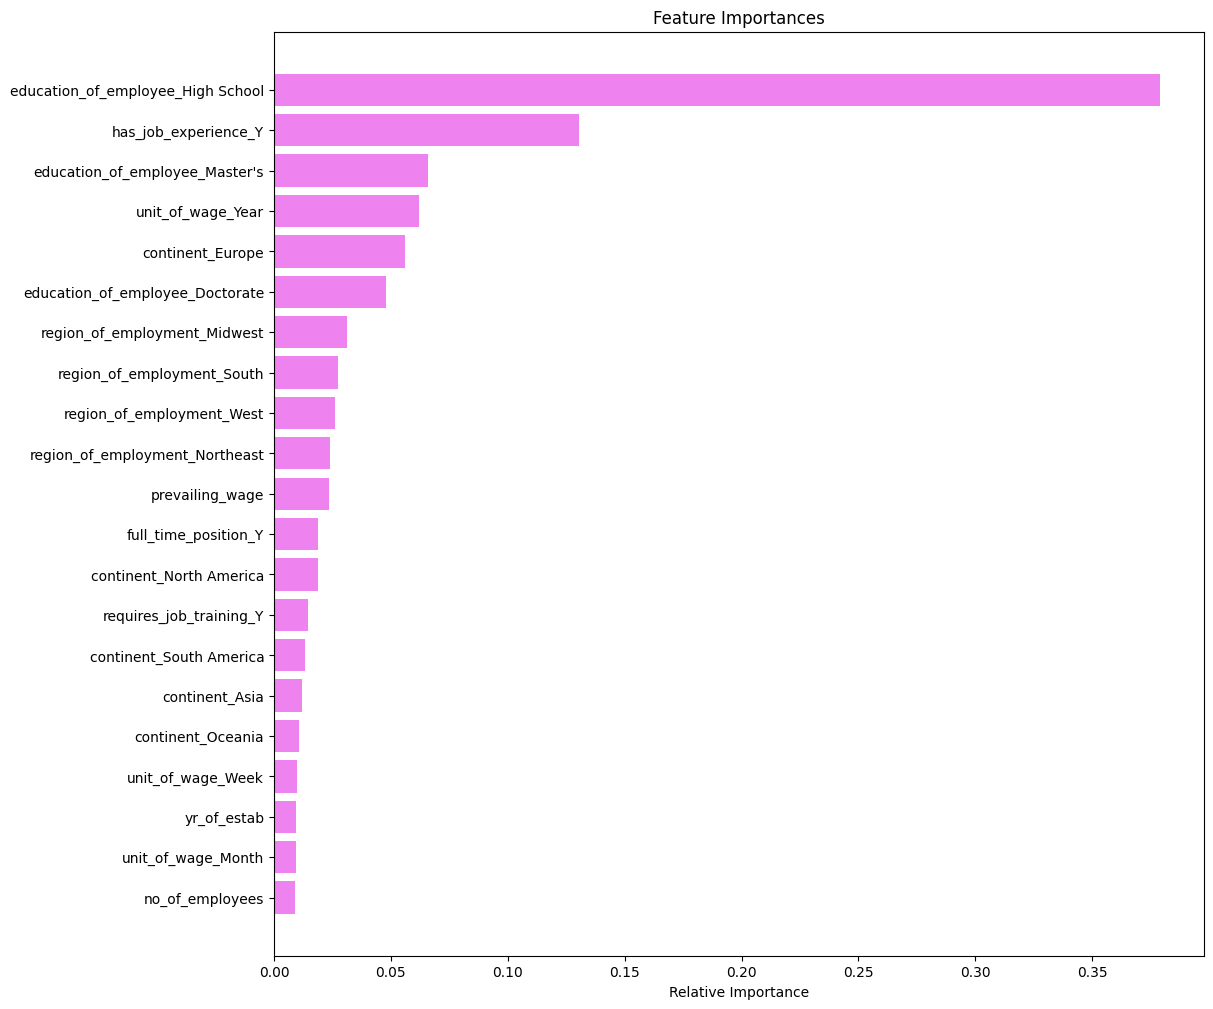

In [198]:
feature_names = x_train.columns

importances=model_xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Visualisation of Decision Tree Tuned

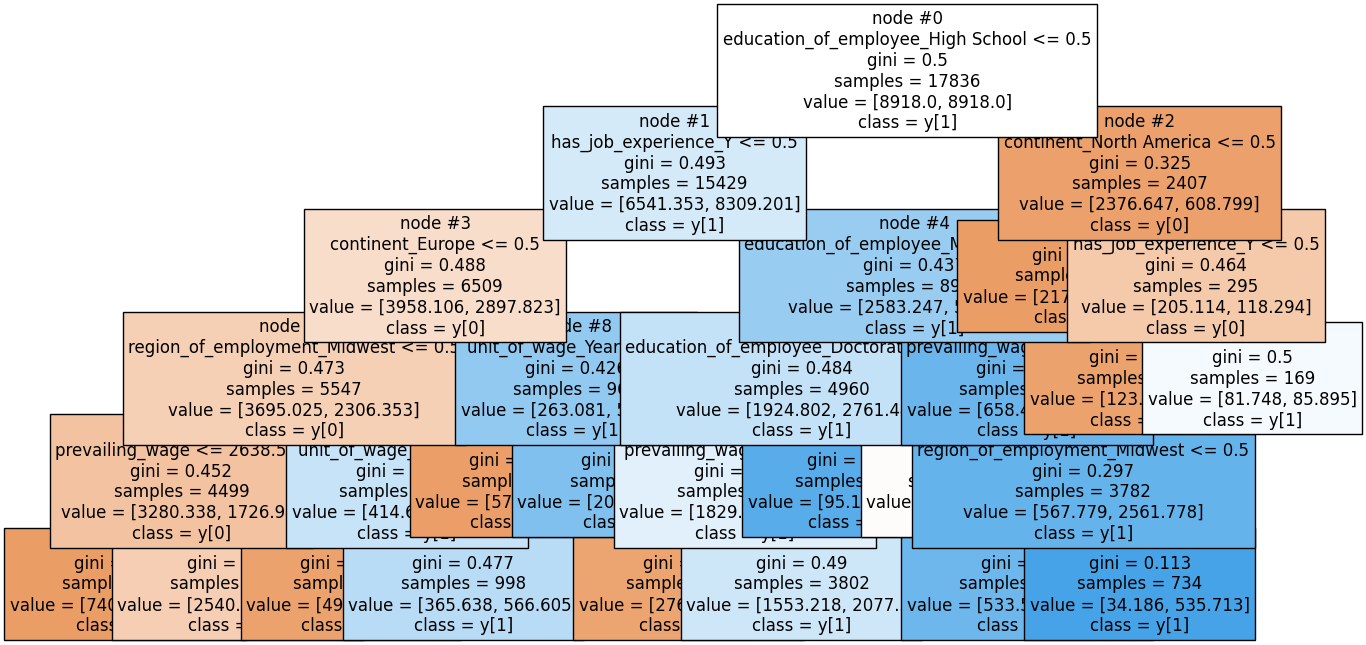

In [202]:
#create visualization of tuned decision-tree model
feature_names = list(X.columns)
plt.figure(figsize=(16,8))
tree.plot_tree(dtree_estimator_tuned,feature_names=feature_names,filled=True,fontsize=12,node_ids=True,class_names=True)
plt.show()


## Business Insights and Recommendations


## Conclusions

#### Insights
For the important features list the three most critical components for pre-screening an applicant are:
* *Education level*
    * An applicant applying for a job requiring a high school diploma will more than likely be issued with visa. Other required qualifications are masters and PHD in that order of priority. Clearly education qualifications is an important factor for consideration of approval for visa.
* *Prior job experience*
    * Applicants with prior job experience is more likley to be issued with visa than an applicant for a job without experience.
* *Unit of wage per year*
    * The higher the annual wage of the job an applicant is applying for, the more likely the application will be approved. This is especially true for applications for jobs with yearly unit of wage.
    
#### Recommendations
* To prioritize limited resources towards screening a batch of applications for those most likely to be approved, the OFLC can:
    * Sort applications by level of education and review the higher levels of education first.
    * Sort applications by previous job experience and review those with experience first.
    * Divide applications for jobs into those with an hourly wage and those with an annual wage, sort each group by the prevailing wage, then review applications for salaried jobs first from highest to lowest wage.
    * The best performing model i.e Tuned XGBoost Classifier should be used to predict those that have higher chances of visa approval. These applicants should be prioritized for visa processing in case there is backlog or too much workload.
    * However the OFLC should be aware that for those in less skilled, entry-level, and/or hourly jobs, the system would appear to be biased against these applications being certified.

**Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase

- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost:

```
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
```